# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite

def Bayes1a(X, y, X_test):
    Xy0 = X[y == -1]
    Xy1 = X[y == 1]
    priory0 = len(Xy0) / len(X)
    priory1 = len(Xy1) / len(X)


    uminus= [[0][0]]
    upos=[[0][0]]

    for x in range ( len(X)):
      if y[x]== -1 :
         uminus = uminus + X[x]
      if y[x]== 1:
         upos = upos + X[x]

    uminus = uminus/len(Xy0);
    upos = upos/len(Xy1)
    std_dev1=1
    std_dev2=1
    corln=0
    def calc_prob1(x,u):
      temp = np.exp(-(((x[0]-u[0])**2/(std_dev1**2) + (x[1]-u[1])**2/(std_dev2**2) - (2*corln*(x[1]-u[1])*(x[0]-u[0]))/(std_dev1*std_dev2) )/(2*(1-(corln*corln)))))
      return (1/((2*np.pi)*(std_dev1*std_dev2)))*(np.sqrt(1-(corln*corln)))*temp

    '''
    def calc_prob1(x,mean,sigma):
        temp = np.exp(-((x-mean)**2/(2*sigma**2)))
        return (1/(np.sqrt(2*np.pi)*sigma))*temp
      '''
    ans = []
    for x in range (len(X_test)) :
      py0= priory0* calc_prob1(X_test[x],uminus)
      py1= priory1* calc_prob1(X_test[x],upos)
      if py0 > py1 :
          ans.append(-1)
      else:
          ans.append(1)

   # print(ans)
    return ans


    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

def Bayes1b(X, y, X_test):
     Xy0 = X[y == -1]
     Xy1 = X[y == 1]
     priory0 = len(Xy0) / len(X)
     priory1 = len(Xy1) / len(X)
   #  print(priory0, priory1)


     uminus= [[0][0]]
     upos=[[0][0]]

     for x in range ( len(X)):
       if y[x]== -1 :
          uminus = uminus + X[x]
       if y[x]== 1:
          upos = upos + X[x]

     uminus = uminus/len(Xy0)
     upos = upos/len(Xy1)

   #  print(uminus , upos)

     std_dev1=0
     std_dev2=0
     cov=0
     for x in range ( len(X)):
       if y[x]== -1 :
          std_dev1 += (X[x][0]-uminus[0])*(X[x][0]-uminus[0])
          std_dev2 += (X[x][1]-uminus[1])*(X[x][1]-uminus[1])
          cov += (X[x][0]-uminus[0])*(X[x][1]-uminus[1])
       if y[x]== 1:
          std_dev1 += (X[x][0]-upos[0])*(X[x][0]-upos[0])
          std_dev2 += (X[x][1]-upos[1])*(X[x][1]-upos[1])
          cov+=(X[x][0]-upos[0])*(X[x][1]-upos[1])

     std_dev1 = std_dev1 /len(X)
     std_dev2 = std_dev2 /len(X)
     cov= cov/len(X)

     std_dev1 = np.sqrt(std_dev1)
     std_dev2 = np.sqrt(std_dev2)

     corln= cov/(std_dev1*std_dev2)

     def calc_prob1(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_dev1**2) + (x[1]-u[1])**2/(std_dev2**2) - (2*corln*(x[1]-u[1])*(x[0]-u[0]))/(std_dev1*std_dev2) )/(2*(1-(corln*corln)))))
        return (1/((2*np.pi)*(std_dev1*std_dev2)))*(np.sqrt(1-(corln*corln)))*temp

     ans = []
     for x in range (len(X_test)) :
       py0= priory0* calc_prob1(X_test[x],uminus)
       py1= priory1* calc_prob1(X_test[x],upos)
       if py0 > py1 :
           ans.append(-1)
       else:
           ans.append(1)

   #  print(ans)
     return ans




     """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

def Bayes1c(X, y, X_test):

     Xy0 = X[y == -1]
     Xy1 = X[y == 1]
     priory0 = len(Xy0) / len(X)
     priory1 = len(Xy1) / len(X)
    # print(priory0, priory1)


     uminus= [[0][0]]
     upos=[[0][0]]

     for x in range ( len(X)):
       if y[x]== -1 :
          uminus = uminus + X[x]
       if y[x]== 1:
          upos = upos + X[x]

     uminus = uminus/len(Xy0)
     upos = upos/len(Xy1)

    # print(uminus , upos)

     std_devm1=0
     std_devp1=0
     std_devm2=0
     std_devp2=0
     covm=0
     covp=0
     for x in range ( len(X)):
       if y[x]== -1 :
          std_devm1 += (X[x][0]-uminus[0])*(X[x][0]-uminus[0])
          std_devm2 += (X[x][1]-uminus[1])*(X[x][1]-uminus[1])
          covm += (X[x][0]-uminus[0])*(X[x][1]-uminus[1])
       if y[x]== 1:
          std_devp1 += (X[x][0]-upos[0])*(X[x][0]-upos[0])
          std_devp2 += (X[x][1]-upos[1])*(X[x][1]-upos[1])
          covp+=(X[x][0]-upos[0])*(X[x][1]-upos[1])

     std_devm1 = std_devm1 /len(Xy0)
     std_devp1 = std_devp1 /len(Xy1)

     std_devm2 = std_devm2 /len(Xy0)
     std_devp2 = std_devp2 /len(Xy1)
     covm= covm/len(Xy0)
     covp= covp/len(Xy1)

     std_devm1 = np.sqrt(std_devm1)
     std_devp1 = np.sqrt(std_devp1)
     std_devm2 = np.sqrt(std_devm2)
     std_devp2 = np.sqrt(std_devp2)

     corlnp= covp/(std_devp1*std_devp2)
     corlnm= covm/(std_devm1*std_devm2)

     def calc_probm(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_devm1**2) + (x[1]-u[1])**2/(std_devm2**2) - (2*corlnm*(x[1]-u[1])*(x[0]-u[0]))/(std_devm1*std_devm2) )/(2*(1-(corlnm*corlnm)))))
        return (1/((2*np.pi)*(std_devm1*std_devm2)))*(np.sqrt(1-(corlnm*corlnm)))*temp

     def calc_probp(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_devp1**2) + (x[1]-u[1])**2/(std_devp2**2) - (2*corlnp*(x[1]-u[1])*(x[0]-u[0]))/(std_devp1*std_devp2))/(2*(1-(corlnm*corlnm)))) )
        return (1/((2*np.pi)*(std_devp1*std_devp2))*(np.sqrt(1-(corlnp*corlnp))))*temp

     ans = []
     for x in range (len(X_test)) :
       py0= priory0* calc_probm(X_test[x],uminus)
       py1= priory1* calc_probp(X_test[x],upos)
       if py0 > py1 :
           ans.append(-1)
       else:
           ans.append(1)

    # print(ans)
     return ans


     """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """







In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


'''X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
'''
a=np.load('/content/dataset1_1.npz')
X_train=a['arr_0']
Y_train=a['arr_1']
X_test=a['arr_2']
Y_test=a['arr_3']

a=np.load('/content/dataset1_2.npz')
X_train2=a['arr_0']
Y_train2=a['arr_1']
X_test2=a['arr_2']
Y_test2=a['arr_3']

a=np.load('/content/dataset1_3.npz')
X_train3=a['arr_0']
Y_train3=a['arr_1']
X_test3=a['arr_2']
Y_test3=a['arr_3']


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


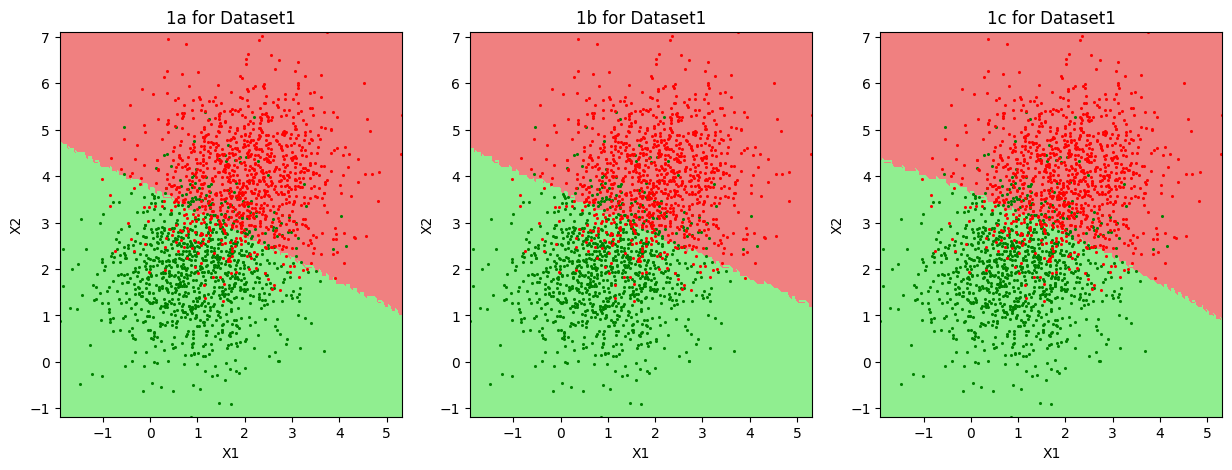

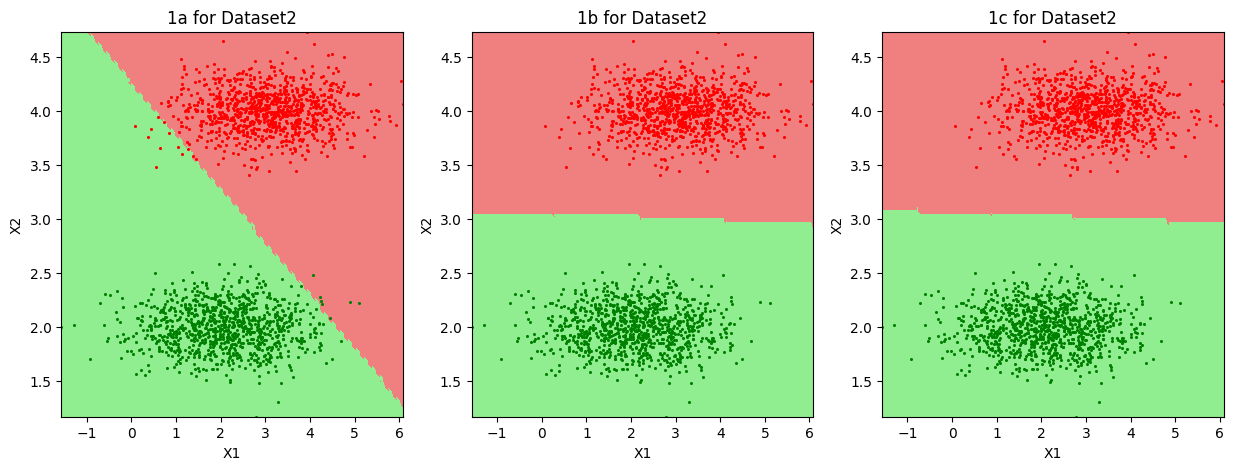

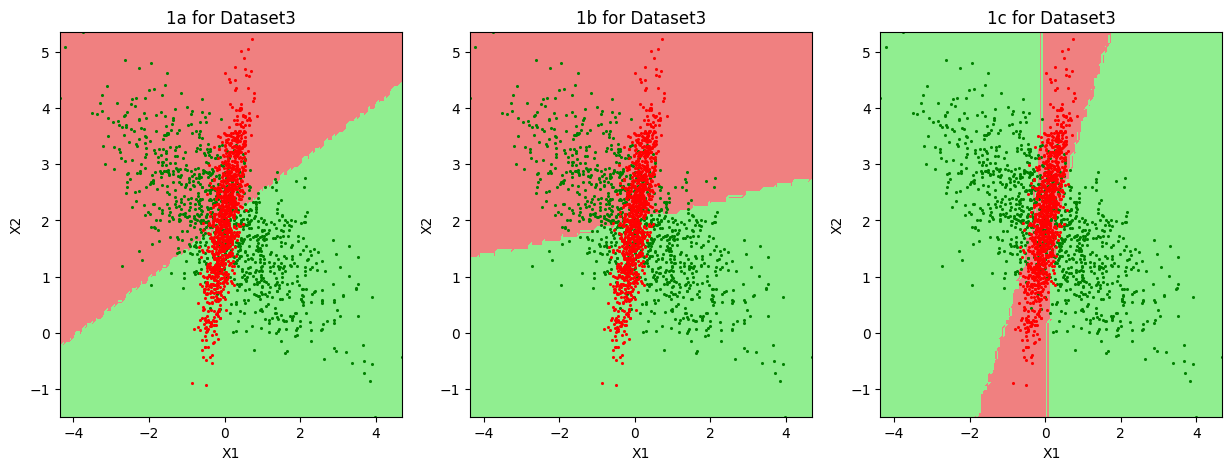

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)



'''X_tester = X_test
X_test2er = X_test2
X_test3er = X_test
X_test = np.concatenate((X_test, X_train))
X_test2 = np.concatenate((X_test2 , X_train2 ))
X_test3 = np.concatenate((X_test3 , X_train3 ))
'''
err1_1=0
err1_2=0
err1_3=0

err2_1=0
err2_2=0
err2_3=0

err3_1=0
err3_2=0
err3_3=0

minX1_1=X_train[0][0]
minX2_1=X_train[0][1]
maxX1_1=X_train[0][0]
maxX2_1=X_train[0][1]

minX1_2=X_train2[0][0]
minX2_2=X_train2[0][1]
maxX1_2=X_train2[0][0]
maxX2_2=X_train2[0][1]

minX1_3=X_train3[0][0]
minX2_3=X_train3[0][1]
maxX1_3=X_train3[0][0]
maxX2_3=X_train3[0][1]


# for dataset1 plot.figure(figsize(15, 5))

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_train)):
   minX1_1=min(minX1_1, X_train[m][0])
   minX2_1=min(minX2_1, X_train[m][1])

   maxX1_1=max(maxX1_1, X_train[m][0])
   maxX2_1=max(maxX2_1, X_train[m][1])




ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = Bayes1a(X_train,Y_train,temp)
ftr_Z2 = Bayes1b(X_train,Y_train,temp)
ftr_Z3 = Bayes1c(X_train,Y_train,temp)

tst_Z1 = Bayes1a(X_train,Y_train,X_test)
tst_Z2 = Bayes1b(X_train,Y_train,X_test)
tst_Z3 = Bayes1c(X_train,Y_train,X_test)

for m in range(len(X_test)):
  if(tst_Z1[m]!=Y_test[m]):
    err1_1+=1
  if(tst_Z2[m]!=Y_test[m]):
    err1_2+=1
  if(tst_Z3[m]!=Y_test[m]):
    err1_3+=1

Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, Z2,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, Z3,colors=['lightcoral', 'lightgreen'])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('1a for Dataset1')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('1b for Dataset1')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('1c for Dataset1')

for m in range(len(X_train)):
   if Y_train[m]==1:
     ax1.scatter(X_train[m][0],X_train[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_train[m][0],X_train[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_train[m][0],X_train[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_train[m][0],X_train[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_train[m][0],X_train[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_train[m][0],X_train[m][1],c='red',s=5,linewidth=0)

plt.show()


# for dataset2 plot.figure(figsize(15, 5))

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('1a for Dataset2')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('1b for Dataset2')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('1c for Dataset2')

for m in range(len(X_train2)):
   minX1_2=min(minX1_2, X_train2[m][0])
   minX2_2=min(minX2_2, X_train2[m][1])

   maxX1_2=max(maxX1_2, X_train2[m][0])
   maxX2_2=max(maxX2_2, X_train2[m][1])

ftr_X= np.linspace(minX1_2, maxX1_2, 100)
ftr_Y= np.linspace(minX2_2, maxX2_2, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = Bayes1a(X_train2,Y_train2,temp)
ftr_Z2 = Bayes1b(X_train2,Y_train2,temp)
ftr_Z3 = Bayes1c(X_train2,Y_train2,temp)

tst_Z1 = Bayes1a(X_train2,Y_train2,X_test2)
tst_Z2 = Bayes1b(X_train2,Y_train2,X_test2)
tst_Z3 = Bayes1c(X_train2,Y_train2,X_test2)

for m in range(len(X_test2)):
  if(tst_Z1[m]!=Y_test2[m]):
    err2_1+=1
  if(tst_Z2[m]!=Y_test2[m]):
    err2_2+=1
  if(tst_Z3[m]!=Y_test2[m]):
    err2_3+=1

Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, Z2,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, Z3,colors=['lightcoral', 'lightgreen'])

for m in range(len(X_train2)):
   if Y_train2[m]==1:
     ax1.scatter(X_train2[m][0],X_train2[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_train2[m][0],X_train2[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_train2[m][0],X_train2[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_train2[m][0],X_train2[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_train2[m][0],X_train2[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_train2[m][0],X_train2[m][1],c='red',s=5,linewidth=0)

plt.show()

# for dataset3 plot.figure(figsize(15, 5))

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('1a for Dataset3')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('1b for Dataset3')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('1c for Dataset3')

for m in range(len(X_train3)):
   minX1_3=min(minX1_3, X_train3[m][0])
   minX2_3=min(minX2_3, X_train3[m][1])

   maxX1_3=max(maxX1_3, X_train3[m][0])
   maxX2_3=max(maxX2_3, X_train3[m][1])

ftr_X= np.linspace(minX1_3, maxX1_3, 100)
ftr_Y= np.linspace(minX2_3, maxX2_3, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = Bayes1a(X_train3,Y_train3,temp)
ftr_Z2 = Bayes1b(X_train3,Y_train3,temp)
ftr_Z3 = Bayes1c(X_train3,Y_train3,temp)

tst_Z1 = Bayes1a(X_train3,Y_train3,X_test3)
tst_Z2 = Bayes1b(X_train3,Y_train3,X_test3)
tst_Z3 = Bayes1c(X_train3,Y_train3,X_test3)

for m in range(len(X_test3)):
  if(tst_Z1[m]!=Y_test3[m]):
    err3_1+=1
  if(tst_Z2[m]!=Y_test3[m]):
    err3_2+=1
  if(tst_Z3[m]!=Y_test3[m]):
    err3_3+=1

Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, Z2,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, Z3,colors=['lightcoral', 'lightgreen'])

for m in range(len(X_train3)):
   if Y_train3[m]==1:
     ax1.scatter(X_train3[m][0],X_train3[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_train3[m][0],X_train3[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_train3[m][0],X_train3[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_train3[m][0],X_train3[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_train3[m][0],X_train3[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_train3[m][0],X_train3[m][1],c='red',s=5,linewidth=0)

plt.show()


** Cell type : TextWrite **
(Write your observations and table of errors here)




** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X, y, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    Xy1 = X[y == 1]
    Xy2 = X[y == 2]
    Xy3 = X[y==3]
    Xy4 = X[y==4]

    priory1 = len(Xy1) / len(X)
    priory2 = len(Xy2) / len(X)
    priory3 = len(Xy3) / len(X)
    priory4 = len(Xy4) / len(X)


    u1= [[0][0]]
    u2=[[0][0]]
    u3= [[0][0]]
    u4=[[0][0]]

    for x in range ( len(X)):
      if y[x]== 1 :
        u1 = u1 + X[x]
      if y[x]== 2:
        u2 = u2 + X[x]
      if y[x]== 3 :
        u3 = u3 + X[x]
      if y[x]== 4:
        u4 = u4 + X[x]

    u1=u1/len(Xy1)
    u2=u2/len(Xy2)
    u3=u3/len(Xy3)
    u4=u4/len(Xy4)



    std_dev1=1
    std_dev2=1
    corln=0
    def calc_prob1(x,u):
      temp = np.exp(-(((x[0]-u[0])**2/(std_dev1**2) + (x[1]-u[1])**2/(std_dev2**2) - (2*corln*(x[1]-u[1])*(x[0]-u[0]))/(std_dev1*std_dev2) )/(2*(1-(corln*corln)))))
      return (1/((2*np.pi)*(std_dev1*std_dev2)))*(np.sqrt(1-(corln*corln)))*temp

    '''
    def calc_prob1(x,mean,sigma):
        temp = np.exp(-((x-mean)**2/(2*sigma**2)))
        return (1/(np.sqrt(2*np.pi)*sigma))*temp
      '''
    ans = []
    for x in range (len(X_test)) :
      py1= priory2*1*calc_prob1(X_test[x],u2) + priory3*2*calc_prob1(X_test[x],u3) + priory4*3*calc_prob1(X_test[x],u4)
      py2= priory1*1*calc_prob1(X_test[x],u1) + priory3*1*calc_prob1(X_test[x],u3) + priory4*2*calc_prob1(X_test[x],u4)
      py3= priory2*2*calc_prob1(X_test[x],u2) + priory1*1*calc_prob1(X_test[x],u1) + priory4*1*calc_prob1(X_test[x],u4)
      py4= priory2*2*calc_prob1(X_test[x],u2) + priory3*1*calc_prob1(X_test[x],u3) + priory1*3*calc_prob1(X_test[x],u1)

      minpy=min(py1,min(py2,min(py3,py4)))

      if(minpy==py1):
        ans.append(1)
      if(minpy==py2):
        ans.append(2)
      if(minpy==py3):
        ans.append(3)
      if(minpy==py4):
        ans.append(4)


    return ans


def Bayes2b(X, y, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    Xy1 = X[y == 1]
    Xy2 = X[y == 2]
    Xy3 = X[y==3]
    Xy4 = X[y==4]

    priory1 = len(Xy1) / len(X)
    priory2 = len(Xy2) / len(X)
    priory3 = len(Xy3) / len(X)
    priory4 = len(Xy4) / len(X)


    u1= [[0][0]]
    u2=[[0][0]]
    u3= [[0][0]]
    u4=[[0][0]]

    for x in range ( len(X)):
      if y[x]== 1 :
        u1 = u1 + X[x]
      if y[x]== 2:
        u2 = u2 + X[x]
      if y[x]== 3 :
        u3 = u3 + X[x]
      if y[x]== 4:
        u4 = u4 + X[x]

    u1=u1/len(Xy1)
    u2=u2/len(Xy2)
    u3=u3/len(Xy3)
    u4=u4/len(Xy4)

   #  print(uminus , upos)

    std_dev1=0
    std_dev2=0
    cov=0
    for x in range ( len(X)):
       if y[x]== 1 :
          std_dev1 += (X[x][0]-u1[0])*(X[x][0]-u1[0])
          std_dev2 += (X[x][1]-u1[1])*(X[x][1]-u1[1])

          cov += (X[x][0]-u1[0])*(X[x][1]-u1[1])
       if y[x]== 2:
          std_dev1 += (X[x][0]-u2[0])*(X[x][0]-u2[0])
          std_dev2 += (X[x][1]-u2[1])*(X[x][1]-u2[1])

          cov += (X[x][0]-u2[0])*(X[x][1]-u2[1])
       if y[x]== 3:
          std_dev1 += (X[x][0]-u3[0])*(X[x][0]-u3[0])
          std_dev2 += (X[x][1]-u3[1])*(X[x][1]-u3[1])

          cov += (X[x][0]-u3[0])*(X[x][1]-u3[1])
       if y[x]== 4:
          std_dev1 += (X[x][0]-u4[0])*(X[x][0]-u4[0])
          std_dev2 += (X[x][1]-u4[1])*(X[x][1]-u4[1])

          cov += (X[x][0]-u4[0])*(X[x][1]-u4[1])

    std_dev1 = std_dev1 /len(X)
    std_dev2 = std_dev2 /len(X)

    cov= cov/len(X)

    std_dev1 = np.sqrt(std_dev1)
    std_dev2 = np.sqrt(std_dev2)


    corln= cov/(std_dev1*std_dev2)

    def calc_prob1(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_dev1**2) + (x[1]-u[1])**2/(std_dev2**2) - (2*corln*(x[1]-u[1])*(x[0]-u[0]))/(std_dev1*std_dev2) )/(2*(1-(corln*corln)))))
        return (1/((2*np.pi)*(std_dev1*std_dev2)))*(np.sqrt(1-(corln*corln)))*temp

    ans = []
    for x in range (len(X_test)) :
      py1= priory2*1*calc_prob1(X_test[x],u2) + priory3*2*calc_prob1(X_test[x],u3) + priory4*3*calc_prob1(X_test[x],u4)
      py2= priory1*1*calc_prob1(X_test[x],u1) + priory3*1*calc_prob1(X_test[x],u3) + priory4*2*calc_prob1(X_test[x],u4)
      py3= priory2*2*calc_prob1(X_test[x],u2) + priory1*1*calc_prob1(X_test[x],u1) + priory4*1*calc_prob1(X_test[x],u4)
      py4= priory2*2*calc_prob1(X_test[x],u2) + priory3*1*calc_prob1(X_test[x],u3) + priory1*3*calc_prob1(X_test[x],u1)

      minpy=min(py1,min(py2,min(py3,py4)))

      if(minpy==py1):
        ans.append(1)
      if(minpy==py2):
        ans.append(2)
      if(minpy==py3):
        ans.append(3)
      if(minpy==py4):
        ans.append(4)



   #  print(ans)
    return ans



def Bayes2c(X, y, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    Xy1 = X[y == 1]
    Xy2 = X[y == 2]
    Xy3 = X[y==3]
    Xy4 = X[y==4]

    priory1 = len(Xy1) / len(X)
    priory2 = len(Xy2) / len(X)
    priory3 = len(Xy3) / len(X)
    priory4 = len(Xy4) / len(X)


    u1= [[0][0]]
    u2=[[0][0]]
    u3= [[0][0]]
    u4=[[0][0]]

    for x in range ( len(X)):
      if y[x]== 1 :
        u1 = u1 + X[x]
      if y[x]== 2:
        u2 = u2 + X[x]
      if y[x]== 3 :
        u3 = u3 + X[x]
      if y[x]== 4:
        u4 = u4 + X[x]

    u1=u1/len(Xy1)
    u2=u2/len(Xy2)
    u3=u3/len(Xy3)
    u4=u4/len(Xy4)

   #  print(uminus , upos)

    std_dev11=0
    std_dev10=0
    std_dev21=0
    std_dev20=0
    std_dev31=0
    std_dev30=0
    std_dev41=0
    std_dev40=0
    cov1=0
    cov2=0
    cov3=0
    cov4=0
    for x in range ( len(X)):
       if y[x]== 1 :
          std_dev10 += (X[x][0]-u1[0])*(X[x][0]-u1[0])
          std_dev11 += (X[x][1]-u1[1])*(X[x][1]-u1[1])

          cov1 += (X[x][0]-u1[0])*(X[x][1]-u1[1])
       if y[x]== 2:
          std_dev20 += (X[x][0]-u2[0])*(X[x][0]-u2[0])
          std_dev21 += (X[x][1]-u2[1])*(X[x][1]-u2[1])

          cov2 += (X[x][0]-u2[0])*(X[x][1]-u2[1])
       if y[x]== 3:
          std_dev30 += (X[x][0]-u3[0])*(X[x][0]-u3[0])
          std_dev31 += (X[x][1]-u3[1])*(X[x][1]-u3[1])

          cov3 += (X[x][0]-u3[0])*(X[x][1]-u3[1])
       if y[x]== 4:
          std_dev40 += (X[x][0]-u4[0])*(X[x][0]-u4[0])
          std_dev41 += (X[x][1]-u4[1])*(X[x][1]-u4[1])

          cov4 += (X[x][0]-u4[0])*(X[x][1]-u4[1])

    std_dev11 = std_dev11 /len(Xy1)
    std_dev10 = std_dev10 /len(Xy1)
    std_dev21 = std_dev21 /len(Xy2)
    std_dev20 = std_dev20 /len(Xy2)
    std_dev31 = std_dev31 /len(Xy3)
    std_dev30 = std_dev30 /len(Xy3)
    std_dev41 = std_dev41 /len(Xy4)
    std_dev40 = std_dev40 /len(Xy4)



    cov1= cov1/len(Xy1)
    cov2= cov2/len(Xy2)
    cov3= cov3/len(Xy3)
    cov4= cov4/len(Xy4)

    std_dev11 = np.sqrt(std_dev11)
    std_dev10 = np.sqrt(std_dev10)
    std_dev21 = np.sqrt(std_dev21)
    std_dev20 = np.sqrt(std_dev20)
    std_dev31 = np.sqrt(std_dev31)
    std_dev30 = np.sqrt(std_dev30)
    std_dev41 = np.sqrt(std_dev41)
    std_dev40 = np.sqrt(std_dev40)

    corln1= cov1/(std_dev10*std_dev11)
    corln2= cov2/(std_dev20*std_dev21)
    corln3= cov3/(std_dev30*std_dev31)
    corln4= cov4/(std_dev40*std_dev41)


    def calc_prob1(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_dev10**2) + (x[1]-u[1])**2/(std_dev11**2) - (2*corln1*(x[1]-u[1])*(x[0]-u[0]))/(std_dev10*std_dev11) )/(2*(1-(corln1*corln1)))))
        return (1/((2*np.pi)*(std_dev10*std_dev11)))*(np.sqrt(1-(corln1*corln1)))*temp

    def calc_prob2(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_dev20**2) + (x[1]-u[1])**2/(std_dev21**2) - (2*corln2*(x[1]-u[1])*(x[0]-u[0]))/(std_dev20*std_dev21) )/(2*(1-(corln2*corln2)))))
        return (1/((2*np.pi)*(std_dev20*std_dev21)))*(np.sqrt(1-(corln2*corln2)))*temp

    def calc_prob3(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_dev30**2) + (x[1]-u[1])**2/(std_dev31**2) - (2*corln3*(x[1]-u[1])*(x[0]-u[0]))/(std_dev30*std_dev31) )/(2*(1-(corln3*corln3)))))
        return (1/((2*np.pi)*(std_dev30*std_dev31)))*(np.sqrt(1-(corln3*corln3)))*temp

    def calc_prob4(x,u):
        temp = np.exp(-(((x[0]-u[0])**2/(std_dev40**2) + (x[1]-u[1])**2/(std_dev41**2) - (2*corln4*(x[1]-u[1])*(x[0]-u[0]))/(std_dev40*std_dev41) )/(2*(1-(corln4*corln4)))))
        return (1/((2*np.pi)*(std_dev40*std_dev41)))*(np.sqrt(1-(corln4*corln4)))*temp


    ans = []
    for x in range (len(X_test)) :
      py1= priory2*1*calc_prob2(X_test[x],u2) + priory3*2*calc_prob3(X_test[x],u3) + priory4*3*calc_prob4(X_test[x],u4)
      py2= priory1*1*calc_prob1(X_test[x],u1) + priory3*1*calc_prob3(X_test[x],u3) + priory4*2*calc_prob4(X_test[x],u4)
      py3= priory2*2*calc_prob2(X_test[x],u2) + priory1*1*calc_prob1(X_test[x],u1) + priory4*1*calc_prob4(X_test[x],u4)
      py4= priory2*2*calc_prob2(X_test[x],u2) + priory3*1*calc_prob3(X_test[x],u3) + priory1*3*calc_prob1(X_test[x],u1)

      minpy=min(py1,min(py2,min(py3,py4)))

      if(minpy==py1):
        ans.append(1)
      if(minpy==py2):
        ans.append(2)
      if(minpy==py3):
        ans.append(3)
      if(minpy==py4):
        ans.append(4)


    return ans








In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

a=np.load('/content/dataset2_1.npz')
X_train=a['arr_0']
Y_train=a['arr_1']
X_test = a['arr_2']
Y_test =a['arr_3']


a=np.load('/content/dataset2_2.npz')
X_train2=a['arr_0']
Y_train2=a['arr_1']
X_test2 = a['arr_2']
Y_test2 =a['arr_3']

'''

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))

'''

Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


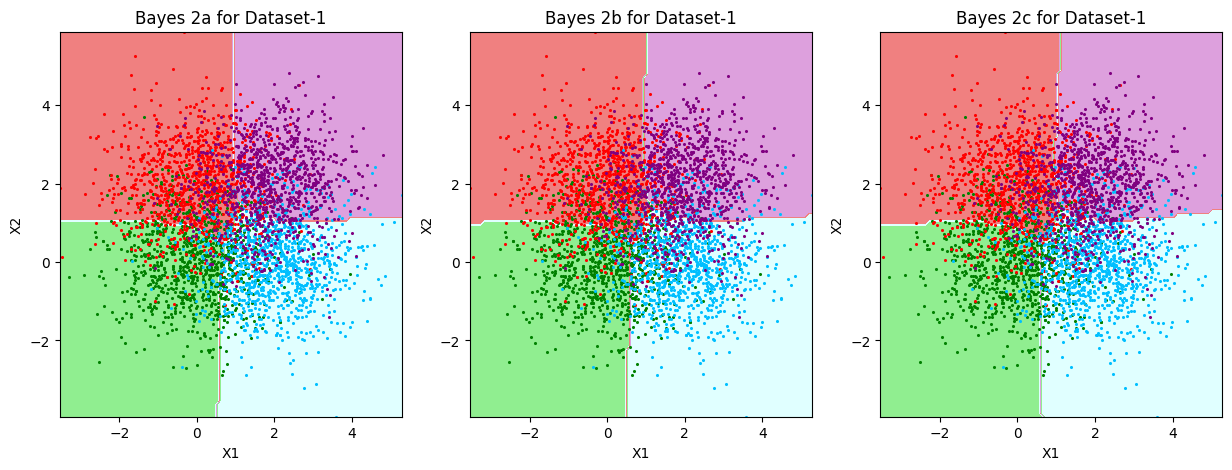

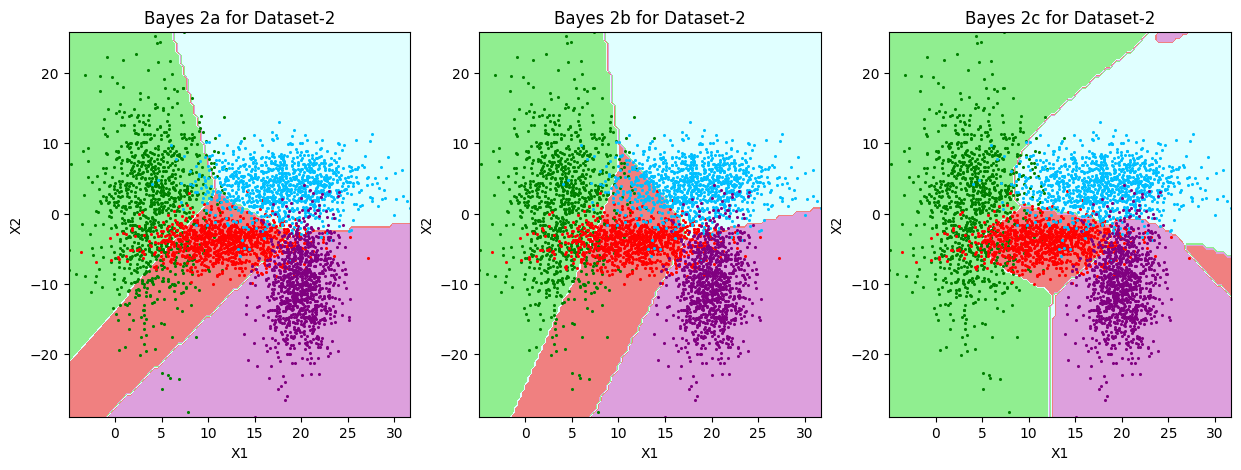

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

expected_loss1_1=0
expected_loss1_2=0
expected_loss1_3=0

expected_loss2_1=0
expected_loss2_2=0
expected_loss2_3=0

mat1_1 = [[0 for _ in range(4)] for _ in range(4)]
mat1_2 = [[0 for _ in range(4)] for _ in range(4)]
mat1_3 = [[0 for _ in range(4)] for _ in range(4)]

mat2_1 = [[0 for _ in range(4)] for _ in range(4)]
mat2_2 = [[0 for _ in range(4)] for _ in range(4)]
mat2_3 = [[0 for _ in range(4)] for _ in range(4)]

loss = [[0, 1, 2, 3], [1,0,1,2],[2,1,0,1],[3,2,1,0]]



minX1_1=X_train[0][0]
minX2_1=X_train[0][1]
maxX1_1=X_train[0][0]
maxX2_1=X_train[0][1]

minX1_2=X_train2[0][0]
minX2_2=X_train2[0][1]
maxX1_2=X_train2[0][0]
maxX2_2=X_train2[0][1]



# for dataset1 plot.figure(figsize(15, 5))

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_train)):
   minX1_1=min(minX1_1, X_train[m][0])
   minX2_1=min(minX2_1, X_train[m][1])

   maxX1_1=max(maxX1_1, X_train[m][0])
   maxX2_1=max(maxX2_1, X_train[m][1])




ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = Bayes2a(X_train,Y_train,temp)
ftr_Z2 = Bayes2b(X_train,Y_train,temp)
ftr_Z3 = Bayes2c(X_train,Y_train,temp)

tst_Z1 = Bayes2a(X_train,Y_train,X_test)
tst_Z2 = Bayes2b(X_train,Y_train,X_test)
tst_Z3 = Bayes2c(X_train,Y_train,X_test)

for m in range(len(X_test)):
   a= (int) (Y_test[m]-1)
   b= (int) (tst_Z1[m] -1)
   c= (int) (tst_Z2[m] -1)
   d= (int) (tst_Z3[m] -1)

   expected_loss1_1 += loss[b][a]
   expected_loss1_2 += loss[c][a]
   expected_loss1_3 += loss[d][a]

   mat1_1[b][a]  +=1
   mat1_2 [c][a] +=1
   mat1_3 [d][a]+=1

Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Bayes 2a for Dataset-1')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('Bayes 2b for Dataset-1')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('Bayes 2c for Dataset-1')


ax1.contourf(X1, Y1, Z1,colors=[ 'lightgreen','lightcyan', 'lightcoral','plum'])
ax2.contourf(X1, Y1, Z2,colors=[ 'lightgreen','lightcyan', 'lightcoral','plum'])
ax3.contourf(X1, Y1, Z3,colors=['lightgreen','lightcyan','lightcoral', 'plum'])

for m in range(len(X_train)):
   if Y_train[m]==1:
     ax1.scatter(X_train[m][0],X_train[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_train[m][0],X_train[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_train[m][0],X_train[m][1],c='green',s=5,linewidth=0)
   if Y_train[m]==2:
     ax1.scatter(X_train[m][0],X_train[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_train[m][0],X_train[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_train[m][0],X_train[m][1],c='red',s=5,linewidth=0)
   if Y_train[m]==3:
     ax1.scatter(X_train[m][0],X_train[m][1],c='deepskyblue',s=5,linewidth=0)
     ax2.scatter(X_train[m][0],X_train[m][1],c='deepskyblue',s=5,linewidth=0)
     ax3.scatter(X_train[m][0],X_train[m][1],c='deepskyblue',s=5,linewidth=0)
   if Y_train[m]==4:
     ax1.scatter(X_train[m][0],X_train[m][1],c='purple',s=5,linewidth=0)
     ax2.scatter(X_train[m][0],X_train[m][1],c='purple',s=5,linewidth=0)
     ax3.scatter(X_train[m][0],X_train[m][1],c='purple',s=5,linewidth=0)

plt.show()

# for dataset2 plot.figure(figsize(15, 5))

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_train2)):
   minX1_2=min(minX1_2, X_train2[m][0])
   minX2_2=min(minX2_2, X_train2[m][1])

   maxX1_2=max(maxX1_2, X_train2[m][0])
   maxX2_2=max(maxX2_2, X_train2[m][1])




ftr_X= np.linspace(minX1_2, maxX1_2, 100)
ftr_Y= np.linspace(minX2_2, maxX2_2, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = Bayes2a(X_train2,Y_train2,temp)
ftr_Z2 = Bayes2b(X_train2,Y_train2,temp)
ftr_Z3 = Bayes2c(X_train2,Y_train2,temp)

tst_Z1 = Bayes2a(X_train2,Y_train2,X_test2)
tst_Z2 = Bayes2b(X_train2,Y_train2,X_test2)
tst_Z3 = Bayes2c(X_train2,Y_train2,X_test2)

for m in range(len(X_test2)):
   a= (int) (Y_test2[m]-1)
   b= (int) (tst_Z1[m] -1)
   c= (int) (tst_Z2[m] -1)
   d= (int) (tst_Z3[m] -1)

   expected_loss2_1 += loss[b][a]
   expected_loss2_2 += loss[c][a]
   expected_loss2_3 += loss[d][a]

   mat2_1[b][a]  +=1
   mat2_2 [c][a] +=1
   mat2_3 [d][a]+=1

Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Bayes 2a for Dataset-2')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('Bayes 2b for Dataset-2')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('Bayes 2c for Dataset-2')

ax1.contourf(X1, Y1, Z1,colors=[ 'lightgreen','lightcyan', 'lightcoral','plum'])
ax2.contourf(X1, Y1, Z2,colors=[ 'lightgreen','lightcyan', 'lightcoral','plum'])
ax3.contourf(X1, Y1, Z3,colors=['lightgreen','lightcyan','lightcoral', 'plum'])

for m in range(len(X_train2)):
   if Y_train2[m]==1:
     ax1.scatter(X_train2[m][0],X_train2[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_train2[m][0],X_train2[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_train2[m][0],X_train2[m][1],c='green',s=5,linewidth=0)
   if Y_train2[m]==2:
     ax1.scatter(X_train2[m][0],X_train2[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_train2[m][0],X_train2[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_train2[m][0],X_train2[m][1],c='red',s=5,linewidth=0)
   if Y_train2[m]==3:
     ax1.scatter(X_train2[m][0],X_train2[m][1],c='deepskyblue',s=5,linewidth=0)
     ax2.scatter(X_train2[m][0],X_train2[m][1],c='deepskyblue',s=5,linewidth=0)
     ax3.scatter(X_train2[m][0],X_train2[m][1],c='deepskyblue',s=5,linewidth=0)
   if Y_train2[m]==4:
     ax1.scatter(X_train2[m][0],X_train2[m][1],c='purple',s=5,linewidth=0)
     ax2.scatter(X_train2[m][0],X_train2[m][1],c='purple',s=5,linewidth=0)
     ax3.scatter(X_train2[m][0],X_train2[m][1],c='purple',s=5,linewidth=0)

plt.show()





** Cell type : TextWrite **
(Write your observations and table of errors here)

Observations:-
By observing the plots for dataset2_2 and expected loss matrix we can say that bayes2c is performing well as compared 2a and 2b. all performed almost equally on dataset-1 . while bayes 2b performed better than bayes 2a on dataset-2

Expected Loss:-

\begin{array}{|c|c|} \hline
  & Bayes2a & Bayes2b & Bayes2c \\ \hline
dataset2\_1 & 0.44775 & 0.44875 & 0.44925 \\ \hline
dataset2\_2 & 0.1835 & 0.19125 & 0.14375\\ \hline
\end{array}

Confusion matrix for dataset 2_1 and bayes 2a:-

\begin{array}{|c|c|} \hline
 pred\backslash act & 1 & 2 & 3 & 4 \\ \hline
1 & 576 & 95 & 64 & 11 \\ \hline
2 & 193 & 749  & 35 & 144 \\ \hline
3 & 217  & 45  & 801 & 176\\ \hline
4 & 14 & 111  & 100 & 669\\ \hline
\end{array}

Confusion matrix for dataset 2_1 and bayes 2b:-

\begin{array}{|c|c|} \hline
 pred\backslash act & 1 & 2 & 3 & 4 \\ \hline
1 & 572 & 93 & 63 & 11 \\ \hline
2 & 192 & 752  & 35 & 145 \\ \hline
3 & 222  & 46  & 803 & 177\\ \hline
4 & 14 & 109  & 99 & 667\\ \hline
\end{array}

Confusion matrix for dataset 2_1 and bayes 2c:-

\begin{array}{|c|c|} \hline
 pred\backslash act & 1 & 2 & 3 & 4 \\ \hline
1 & 572 & 97 & 62 & 11 \\ \hline
2 & 193 & 747  & 35 & 144 \\ \hline
3 & 221  & 45  & 802 & 175\\ \hline
4 & 14 & 111  & 101 & 670\\ \hline
\end{array}

Confusion matrix for dataset 2_2 and bayes 2a:-

\begin{array}{|c|c|} \hline
 pred\backslash act & 1 & 2 & 3 & 4 \\ \hline
1 & 830 & 93 & 30 & 0 \\ \hline
2 & 150 & 787  & 62 & 25 \\ \hline
3 & 18  & 43  & 904 & 76\\ \hline
4 & 2 & 77  & 4 & 899\\ \hline
\end{array}

Confusion matrix for dataset 2_2 and bayes 2b:-

\begin{array}{|c|c|} \hline
 pred\backslash act & 1 & 2 & 3 & 4 \\ \hline
1 & 891 & 119 & 23 & 0 \\ \hline
2 & 105 & 746  & 160 & 12 \\ \hline
3 & 4  & 45  & 810 & 71\\ \hline
4 & 0 & 90  & 7 & 917\\ \hline
\end{array}

Confusion matrix for dataset 2_2 and bayes 2c:-

\begin{array}{|c|c|} \hline
 pred\backslash act & 1 & 2 & 3 & 4 \\ \hline
1 & 892 & 64 & 15 & 0 \\ \hline
2 & 79 & 839  & 43 & 37 \\ \hline
3 & 29  & 21  & 926 & 38\\ \hline
4 & 0 & 76  & 16 & 925\\ \hline
\end{array}



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




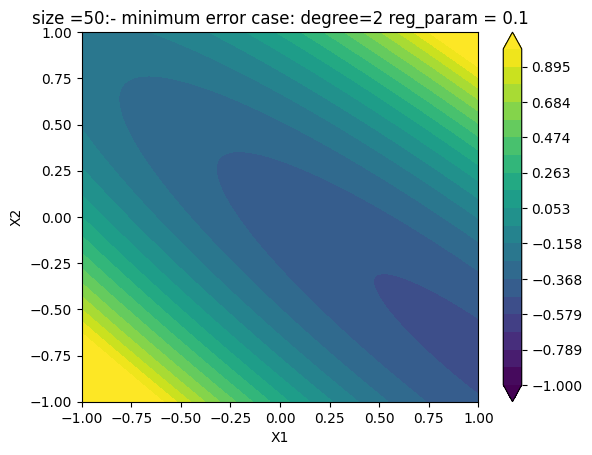

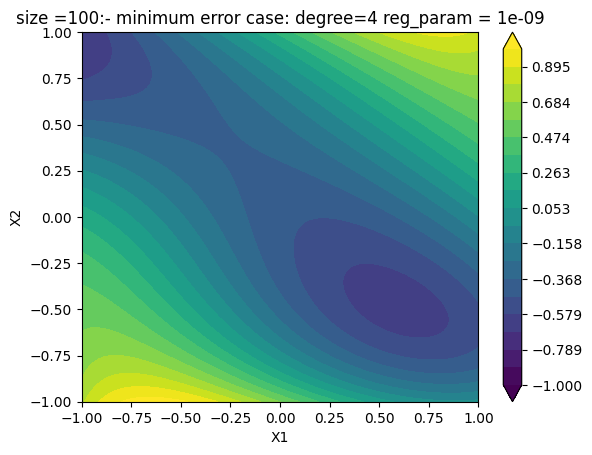

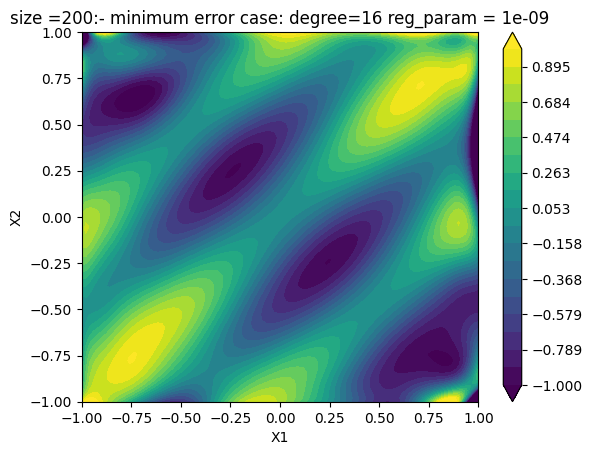

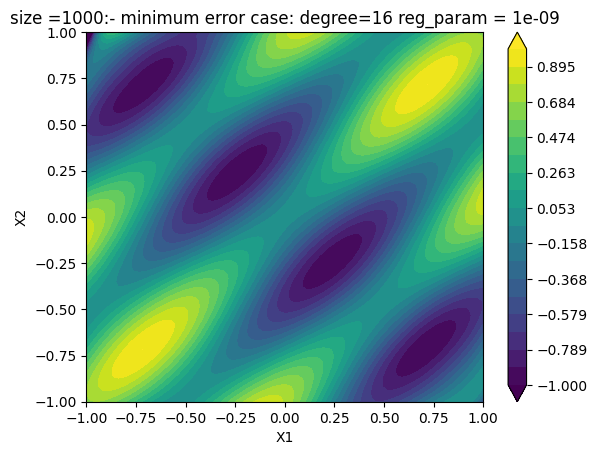

In [ ]:
a=np.load('/content/dataset3_1.npz')
X_train4=a['arr_0']
Y_train4=a['arr_1']
X_test4=a['arr_2']
Y_test4=a['arr_3']

def polynomial_regression_ridge_pred(X_test44, wt_vector, degree=1):

   fi=[]
   for m in range(len(X_test44)):
     fii=[1]
     for i in range(1,degree+1):
       temp=(X_test44[m][1])**(i)
       for j in range(i+1):
         fii.append(temp)
         temp*=X_test44[m][0]
         temp/=X_test44[m][1]
     fi.append(fii)

   wTrans=np.transpose(wt_vector)
   ans=[]
   for m in range(len(X_test44)):
     ans.append(np.dot(wTrans,fi[m]))
   return ans
   """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.

    This should make you aware that feature vector mappings are quite complicated and
    tedious in general.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)

   """




def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.

    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions

    temp=[]
    for i in range(100):
      for j in range(100):
        temp.append([X[i][j], Y[i][j]])
    ftr_Z = polynomial_regression_ridge_pred(temp,wt_vector,degree)
    Z=np.reshape(ftr_Z,[100, 100])
    plt.contourf(X,Y,Z,levels=np.linspace(-1.,1. , 20),extend='both')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar()

def polynomial_regression_ridge_train(X_train4, Y_train4, degree=1, reg_param=0.01):
   fi=[]
   for m in range(len(X_train4)):
     fii=[1]
     for i in range(1,degree+1):
       temp=(X_train4[m][1])**(i)
       for j in range(i+1):
         fii.append(temp)
         temp*=X_train4[m][0]
         temp/=X_train4[m][1]
     fi.append(fii)
   temp=fi
   temp= np.transpose(temp)

   temp_2 = np.matmul(temp,fi)
   val= np.shape(temp_2)
   temp3 = np.identity(val[0])
   temp3 *= reg_param

   temp4=np.add(temp_2,temp3)

   temp7=np.linalg.inv(temp4)
   temp8=np.matmul(temp7,temp)
   Ytrain4=np.transpose(Y_train4)
   temp5=np.matmul(temp8,Ytrain4)

   return temp5

   '''( poly^tpoly+lambdaI)inversepoly^t y'''

   """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'

   """

def compute_BV_error_sample_plot(degree, reg_param, num=50):
   wVector=polynomial_regression_ridge_train(X_train4[0:num], Y_train4[0:num], degree, reg_param)
   now=polynomial_regression_ridge_pred(X_test4,wVector,degree)
   varia=0
   for i in range (len(X_test4)):
     varia+=(now[i]-Y_test4[i])**2
   varia/=len(X_test4)

   nowtrain=polynomial_regression_ridge_pred(X_train4,wVector,degree)
   variatrain=0
   for i in range (len(X_train4)):
     variatrain+=(nowtrain[i]-Y_train4[i])**2
   variatrain/=len(X_train4)
   return varia


vect=[50,100,200,1000]
for j in range(4):
  mindeg=1
  minreg=1e-9
  mine=compute_BV_error_sample_plot(1, 1e-9,vect[j])
  for degree in [1,2,4,8,16]:
     for reg_param in [1e-9,1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
        e = compute_BV_error_sample_plot(degree, reg_param,vect[j])
        if e<mine:
          mine=e
          mindeg=degree
          minreg=reg_param
  wVector=polynomial_regression_ridge_train(X_train4[0:vect[j]], Y_train4[0:vect[j]], mindeg, minreg)
  tit = "size =" + str(vect[j]) + ":- minimum error case: degree="+str(mindeg)+" reg_param = " +str(minreg)
  visualise_polynomial_2d(wVector,mindeg,tit)
  plt.show()


** Cell type : TextWrite **

FINDINGS: We can see that the for training data size 200, 1000 the model with degree=16 and reg_param=1e-09 has got the least test squared error. So we can conclude that to minimise test squared error degree should be more and reg_param should be less.
Also as the size of training data increased the error decreased

Test Squared Error:

size=50

\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 & 0.3012668176334996 & 0.3012668172056581 & 0.3012667744217042 & 0.30126249638185676 & 0.3008382242491873 & 0.278350693890371  
 \\ \hline
2 & 0.15789998862477164 & 0.15789998726922824 & 0.15789985171700208 & 0.15788631804663888 & 0.15673525917060402 & 0.20822364120741077  \\ \hline
4 & 0.1573339660838898 & 0.1573339560159905 & 0.15733295030576805 & 0.15724278102171838 & 0.16182638818918782 & 0.19656859546515704  
\\ \hline
8 & 237.6900574785896 & 172.50186226524877
& 18.59425393210116 & 0.9902507528656445 & 0.16515576169863866 & 0.1939185875290036  
\\ \hline
16 & 250.52227333551707 & 232.02482349662748 & 66.69768434199838 & 2.3373083260669283 & 0.20396145737466187 & 0.1960573216507587  
\\ \hline
\end{array}

size=100
\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 &  0.27314863780495163 & 0.2731486377397292 & 0.27314863121747585 & 0.2731479790203654 & 0.27308304030498115 & 0.2686215397676515
 \\ \hline
2& 0.1532099311828069 & 0.15320993087074353 & 0.1532098996646745 & 0.15320678118763362 & 0.15291576223583922 & 0.17570947703823867  
 \\ \hline
4& 0.14277575186837782 & 0.14277575501902803 & 0.14277607009019888 & 0.1428076385194418 & 0.14602043222215252 & 0.16898019238628906
\\ \hline
8 & 0.7129163506966867 & 0.7113196275007213 & 0.5807591356026088 & 0.20363826301804866 & 0.1626275772179933 & 0.1711684367937078  
\\ \hline
16& 54.079951200096914 & 11.77042042247457 & 23.416588842287354 & 0.41784850840043847 & 0.1883591446691306 & 0.1741599689085644
\\ \hline
\end{array}


   
  



size=200

\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 &0.26766305032842114 & 0.2676630503112202 & 0.2676630485911062 & 0.2676628765832225 & 0.26764571096108336 & 0.266225468967145
 \\ \hline
2 & 0.14578065076871963 & 0.14578065073911017 & 0.14578064777834804 & 0.1457803520762766 & 0.14575448305638775 & 0.158682228884205
 \\ \hline
4 & 0.13117096921340582 & 0.13117096853375276 & 0.13117090057246042 & 0.131164145738303 & 0.1308305345016769 & 0.15708511546569248  
\\ \hline
8& 0.13736299466612986 & 0.13735917852815993 & 0.13698204933188612 & 0.11818259300515196 & 0.11396536050910322 & 0.1564511774819903  
\\ \hline
16& 0.03714986379683295 & 0.083710212098169 & 0.1708066578699384 & 0.08690369897738795 & 0.11121403432996577 & 0.15224401261127363  
\\ \hline
\end{array}

size=1000

\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 & 0.26253465030677064 & 0.2625346503067179 & 0.26253465030149215 & 0.2625346497790772 & 0.2625345976332735 & 0.2625303041565843
 \\ \hline
2 & 0.14242931863755284 & 0.14242931865008027 & 0.14242931990280225 & 0.14242944518520456 & 0.14244207449857818 & 0.14451885114122862  
 \\ \hline
4 & 0.12707962836551767 & 0.1270796285222247 & 0.12707964419304207 & 0.12708121171337608 & 0.12724209494603897 & 0.1409365893522017
\\ \hline
8 & 0.08481273587160357 & 0.08481261182165725 & 0.08480025143228949 & 0.0839132354599052 & 0.09782269201133956 & 0.1349889244235967  
\\ \hline
16 & 0.0011977226450721064 & 0.0014900650020423776 & 0.010957186953060452 & 0.04965812595834956 & 0.09073740480490225 & 0.12782089604965333  
\\ \hline
\end{array}

Train Squared Error:

size=50
\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 & 0.2742613281373705 & 0.27426132775049755 & 0.274261289063243 & 0.2742574206682322 & 0.27387386073937786 & 0.2538510722828249
 \\ \hline
2 & 0.15639983844816358 & 0.15639983655181888 & 0.1563996469196041 & 0.15638070640390903 & 0.15470038587333051 & 0.19150572689443715
 \\ \hline
4 & 0.1554162909270511 & 0.15541627964869426 & 0.155415152751254 & 0.15531150862607762 & 0.1576796412404037 & 0.18084475283707765  
\\ \hline
8 & 184.69125016329085 & 131.83817992682467 & 14.143399158358319 & 0.7804521173236971 & 0.16142320048429876 & 0.17844928699384977
\\ \hline
16 & 195.6751226478925 & 172.67025405145375 & 49.58604113902343 & 1.8305157386121074 & 0.1966936707779655 & 0.18027436644460873
\\ \hline
\end{array}
size=100
\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 & 0.2492446061406099 & 0.2492446060836557 & 0.249244600388297 & 0.24924403087774552 & 0.2491873322395288 & 0.24533170341879565
 \\ \hline
2 & 0.15034659738510742 & 0.15034659689547686 & 0.1503465479326718 & 0.15034165395465543 & 0.14987479418833125 & 0.16364577946749434
 \\ \hline
4 & 0.1421930745274479 & 0.1421930750078003 & 0.14219312305858417 & 0.14219808219614957 & 0.1434334229758184 & 0.1577100886482328
\\ \hline
8 & 0.5826158960512502 & 0.581346982274203 & 0.4777859566339904 & 0.17302199337494417 & 0.1536297378705516 & 0.15941298606158066
\\ \hline
16 & 40.88530520126768 & 6.421402329581789 & 8.544930319734068 & 0.2761118647694439 & 0.1761105082960789 & 0.16158112272083644  
\\ \hline
\end{array}

size=200

\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 & 0.2460727197108907 & 0.24607271969585034 & 0.24607271819182597 & 0.2460725677924155 & 0.24605755776875227 & 0.24480823649089903
 \\ \hline
2 & 0.14273850148520104 & 0.14273850138347557 & 0.1427384912109703 & 0.14273747436236256 & 0.14263976687839938 & 0.1504115780199552
 \\ \hline
4 & 0.13227258816287715 & 0.1322725865767868 & 0.13227242797290492 & 0.13225661916772652 & 0.13110941491968164 & 0.14861956756494643
\\ \hline
8 & 0.1127800193614656 & 0.11277782532377327 & 0.11256118344173756 & 0.10231635191662647 & 0.11410717294233969 & 0.1477114978971861
\\ \hline
16& 0.018534016609076637 & 0.03777312739120392 & 0.05960354698095478 & 0.07405986671923277 & 0.10820400091731774 & 0.1439814646289178
\\ \hline
\end{array}

size=1000
\begin{array}{|c|c|} \hline
 degree\backslash lambda & 1e-7 & 1e-5 & 1e-3 & 1e-1 & 1e1 & 1e3 \\ \hline
1 & 0.24072821851812334 & 0.24072821851812276 & 0.24072821851812287 & 0.2407282185181283 & 0.24072821857035273 & 0.24072871841517676  
 \\ \hline
2 & 0.13882410254246708 & 0.13882410254246716 & 0.13882410254246827 & 0.1388241025534239 & 0.13882421187545027 & 0.13971802344395556
 \\ \hline
4 & 0.1250172421712807 & 0.12501724217128074 & 0.12501724217136287 & 0.12501724299300632 & 0.1250251158363281 & 0.1341720290370397
\\ \hline
8 & 0.0767428535436844 & 0.07674285354504154 & 0.07674286707498423 & 0.0768462164142623 & 0.09483803187328196 & 0.12843822791852466  
\\ \hline
16 & 2.5486027508940295e-05 & 0.0004451268010279208 & 0.006533490642173364 & 0.038415339888117 & 0.08499257629516135 & 0.12168732408409076
\\ \hline
\end{array}




**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











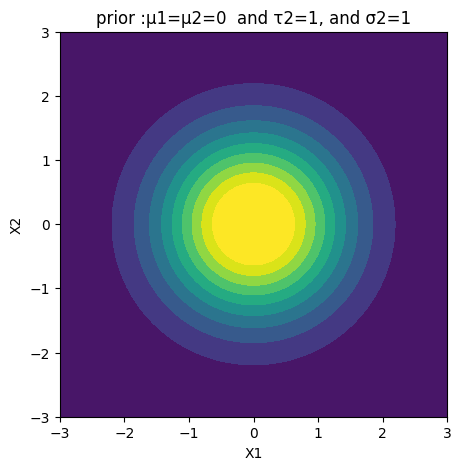

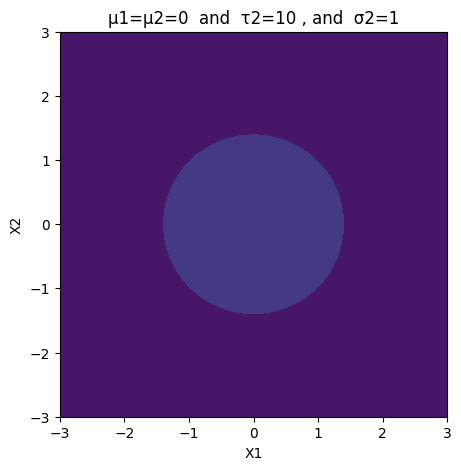

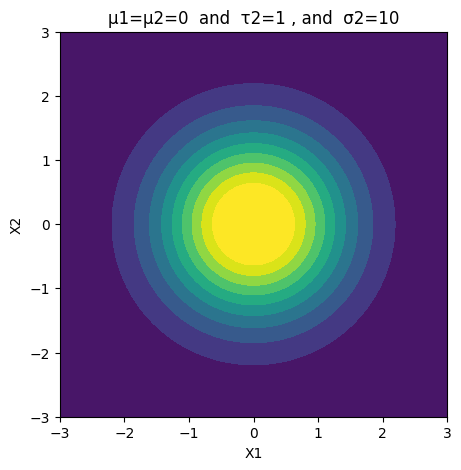

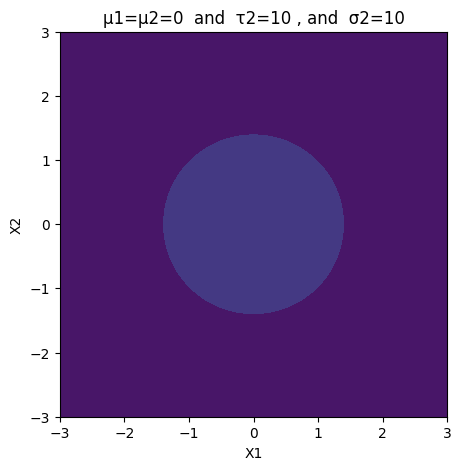

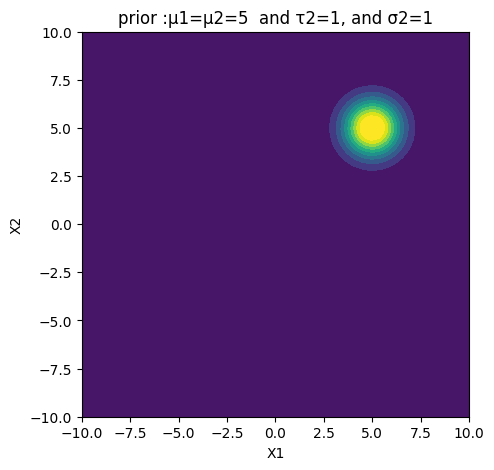

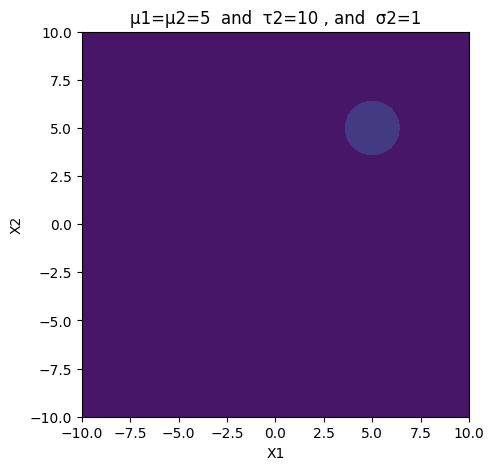

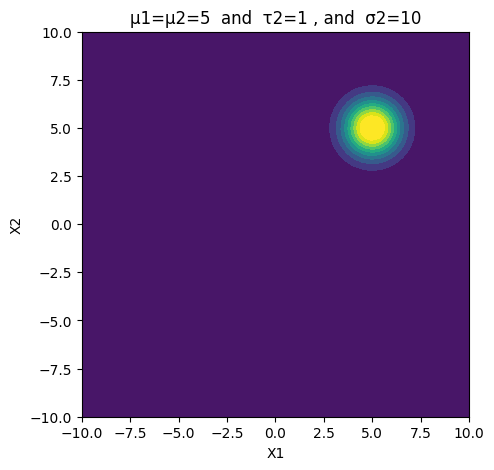

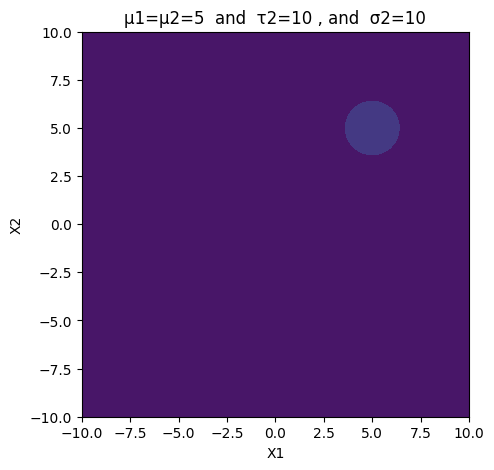

In [ ]:
# Cell type : CodeWrite

def calc_prob(x,u,std_dev1,std_dev2,corln):
      temp = np.exp(-(((x[0]-u[0])**2/(std_dev1**2) + (x[1]-u[1])**2/(std_dev2**2) - (2*corln*(x[1]-u[1])*(x[0]-u[0]))/(std_dev1*std_dev2) )/(2*(1-(corln*corln)))))
      return (1/((2*np.pi)*(std_dev1*std_dev2)))*(np.sqrt(1-(corln*corln)))*temp

ftr_X1=np.linspace(-3,3,100)
ftr_X2=np.linspace(-3,3,100)
[X1,Y1]=np.meshgrid(ftr_X1,ftr_X2)

temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(0)
    me.append(0)
    temp.append(calc_prob(x, me,1,1,0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('prior :μ1=μ2=0  and τ2=1, and σ2=1')
plt.show()


temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(0)
    me.append(0)
    temp.append(calc_prob(x, me,np.sqrt(10),np.sqrt(10),0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('μ1=μ2=0  and  τ2=10 , and  σ2=1')
plt.show()


temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(0)
    me.append(0)
    temp.append(calc_prob(x, me,1,1,0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('μ1=μ2=0  and  τ2=1 , and  σ2=10')
plt.show()


temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(0)
    me.append(0)
    temp.append(calc_prob(x, me,np.sqrt(10),np.sqrt(10),0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('μ1=μ2=0  and  τ2=10 , and  σ2=10')
plt.show()

ftr_X1=np.linspace(-10,10,100)
ftr_X2=np.linspace(-10,10,100)
[X1,Y1]=np.meshgrid(ftr_X1,ftr_X2)

temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(5)
    me.append(5)
    temp.append(calc_prob(x, me,1,1,0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('prior :μ1=μ2=5  and τ2=1, and σ2=1')
plt.show()


temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(5)
    me.append(5)
    temp.append(calc_prob(x, me,np.sqrt(10),np.sqrt(10),0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('μ1=μ2=5  and  τ2=10 , and  σ2=1')
plt.show()


temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(5)
    me.append(5)
    temp.append(calc_prob(x, me,1,1,0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('μ1=μ2=5  and  τ2=1 , and  σ2=10')
plt.show()


temp=[]
for i in range(100):
  for j in range(100):
    x=[]
    x.append(X1[i][j])
    x.append(Y1[i][j])
    me=[]
    me.append(5)
    me.append(5)
    temp.append(calc_prob(x, me,np.sqrt(10),np.sqrt(10),0 ))
Z1=np.reshape(temp,[100, 100])

plt.figure(figsize=(5,5))
plt.contourf(X1, Y1, Z1,levels=np.linspace(0.,0.13, 10),extend='both')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('μ1=μ2=5  and  τ2=10 , and  σ2=10')
plt.show()


** Cell type : TextWrite **

**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd




a=np.load('/content/dataset_A.npz')
X_traina=a['arr_0']
Y_traina=a['arr_1']
X_testa=a['arr_2']
Y_testa=a['arr_3']

a=np.load('/content/dataset_B.npz')
X_trainb=a['arr_0']
Y_trainb=a['arr_1']
X_testb=a['arr_2']
Y_testb=a['arr_3']

a=np.load('/content/dataset_C.npz')
X_trainc=a['arr_0']
Y_trainc=a['arr_1']
X_testc=a['arr_2']
Y_testc=a['arr_3']

a=np.load('/content/dataset_D.npz')
X_traind=a['arr_0']
Y_traind=a['arr_1']
X_testd=a['arr_2']
Y_testd=a['arr_3']



def train_test_split(X,Y):
   X_train=[]
   X_valid=[]
   Y_train=[]
   Y_valid=[]
   for i in range (0,len(X)):
     if (i%5) == 0 :
       X_valid.append(X[i])
       Y_valid.append(Y[i])
     else:
       X_train.append(X[i])
       Y_train.append(Y[i])
   return  np.array(X_train) , np.array(X_valid),np.array(Y_train),np.array(Y_valid)


X_trainA,X_validA,Y_trainA,Y_validA=train_test_split(X_traina,Y_traina)
X_trainB,X_validB,Y_trainB,Y_validB=train_test_split(X_trainb,Y_trainb)
X_trainC,X_validC,Y_trainC,Y_validC=train_test_split(X_trainc,Y_trainc)
X_trainD,X_validD,Y_trainD,Y_validD=train_test_split(X_traind,Y_traind)


In [9]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def sig(var):
  return (1/(1+np.exp(-var)))

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=5):
 n= (X.shape)[0]
 eta=100
 alpha=[]

 K=[]
 if kernel == "linear":
   for i in range(0,n):
      temp=[]
      for j in range(0,n):
        val=0;
        for l in range(0,len(X[i])):
          val = val + X[i][l]*X[j][l]
          temp.append(val)
      K.append(temp)
 if kernel == "rbf":
     for i in range(0,n):
        temp=[]
        for j in range(0,n):
          val=1;
          for l in range(0,len(X[i])):
             val = val + X[i][l]*X[j][l]
          temp.append(pow(val,kernel_param))
        K.append(temp)

 if kernel == "poly":
      for i in range(0,n):
        temp=[]
        for j in range(0,n):
          val=np.linalg.norm(X[i]-X[j]);
          val =val*val
          val = np.exp((-kernel_param)*val)
          temp.append(val)
        K.append(temp)
      K=np.array(K)


 for j in range(0,n):
    alpha.append(1)
 for i in range (0,num_iter_gd):
    alpha=np.array(alpha)
    alphaT=np.transpose(alpha)

    print(K.shape, alpha.shape)

    pro2=np.matmul(K,alpha)
    pro2=np.multiply(reg_param,pro2)
    sum=[]
    for i in range(0,n):
      sum.append([0])
    sum=np.array(sum)
    for i in range(0,n):
      K_now=K[:,i]
      mid=np.matmul(alphaT,K_now)
      mid= mid *(-Y[i])
      mid=sig(mid)
      mid2=K_now *(-Y[i])
      mid2=mid2*mid
      sum =sum + mid

    delta=np.add(pro2,sum)
    delta =delta * eta

    alpha=np.subtract(alpha,delta)
 return alpha




def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):

  '''
    Return the predictions on test_X using the learnt alphas
  '''
  Y_pred=[]

  for x in test_X:
    n=len(train_X)
    sum=0
    for i in range(0,n):
      val=0
      if kernel == "linear":
        for l in range(0,len(train_X[i])):
             val = val + train_X[i][l]*x[l]
      if kernel == "rbf":
        val = val +1
        for l in range(0,len(train_X[i])):
             val = val + train_X[i][l]*x[l]
        val=pow(val,kernel_param)

      if kernel == "poly":
        val=np.linalg.norm(train_X[i]-x);
        val =val*val
        val = np.exp((-kernel_param)*val)

      pro=val*alpha[i]
      sum =sum + pro

    if sum >=0 :
      Y_pred.append(1)
    else:
      Y_pred.append(-1)

def find_best(X,Y,X_test,Y_test):
   error_lin =2000
   error_rbf =2000
   error_poly =2000
   best_c_lin=1
   best_c_rbf=1
   best_c_poly=1

   best_gamma=1
   best_degree=1
   c= [1e-3,1e-2,0.1,1,10,100]
   gamma=[1e-2,0.1,1,10,100]
   degree=[1,2,4,6,8]

   for C in c:
     for j in range(0,5):

       alphal =train_pred_logistic_regression(X,Y,"linear",C,1)
       alphar=train_pred_logistic_regression(X,Y,"rbf",C,gamma[j])
       alphap =train_pred_logistic_regression(X,Y,"poly",C,degree[j])

       y_predl=test_pred(alphal,X,Y,X_test,"linear",1)
       y_predr=test_pred(alphar,X,Y,X_test,"rbf",gamma[j])
       y_predp=test_pred(alphap,X,Y,X_test,"poly",degree[j])
       curr_err_lin=0
       curr_err_rbf=0
       curr_err_poly=0

       for t in range(0,len(Y_test)):
         if Y_test[t]!=y_predl[i]:
           curr_err_lin+=1
         if Y_test[t]!=y_predr[i]:
           curr_err_rbf+=1
         if Y_test[t]!=y_predp[i]:
           curr_err_poly+=1




       if error_lin > curr_err_lin :
         error_lin=curr_err_lin
         best_c_lin = C
       if error_rbf > curr_err_rbf :
         error_rbf=curr_err_rbf
         best_c_rbf = C
         best_gamma=gamma[j]
       if error_poly > curr_err_poly:
         error_poly=curr_err_poly
         best_c_poly = C
         best_degree=degree[j]


   return  best_c_lin,best_c_rbf,best_c_poly,best_gamma,best_degree






In [10]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.

best_c_lina,best_c_rbfa,best_c_polya,best_gammaa,best_degreea =find_best(X_traina,Y_traina,X_testa,Y_testa)
print(best_c_lina,best_c_rbfa,best_c_polya,best_gammaa,best_degreea)


AttributeError: 'list' object has no attribute 'shape'

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  




TypeError: Input z must be 2D, not 0D

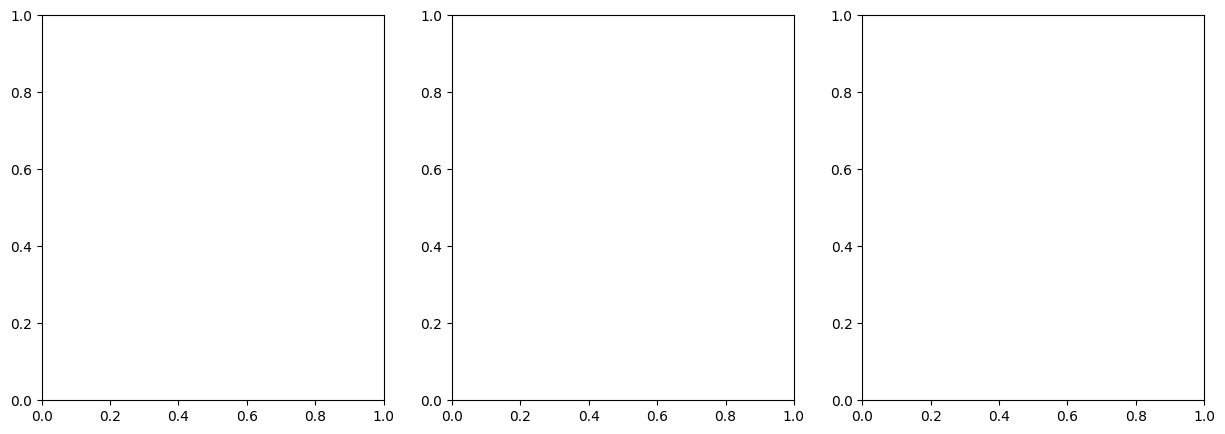

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
minX1_1=X_traina[0][0]
minX2_1=X_traina[0][1]
maxX1_1=X_traina[0][0]
maxX2_1=X_traina[0][1]

minX1_2=X_trainb[0][0]
minX2_2=X_trainb[0][1]
maxX1_2=X_trainb[0][0]
maxX2_2=X_trainb[0][1]

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_traina)):
   minX1_1=min(minX1_1, X_traina[m][0])
   minX2_1=min(minX2_1, X_traina[m][1])

   maxX1_1=max(maxX1_1, X_traina[m][0])
   maxX2_1=max(maxX2_1, X_traina[m][1])


ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)

ftr_Z1=[]
for i in range(100):
  ftr_Z1.append(1)

ftr_Z1=np.array(ftr_Z1)




ax1.contourf(X1, Y1, 1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, 1,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, 1,colors=['lightcoral', 'lightgreen'])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('DatasetA C=0.1 ')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('DatasetA C=10 , ker_param=1')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('DatasetA C=1 , ker_param=3')

for m in range(len(X_traina)):
   if Y_traina[m]==1:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)

plt.show()




fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_trainb)):
   minX1_2=min(minX1_2, X_trainb[m][0])
   minX2_2=min(minX2_2, X_trainb[m][1])

   maxX1_2=max(maxX1_2, X_trainb[m][0])
   maxX2_2=max(maxX2_2, X_trainb[m][1])


ftr_X= np.linspace(minX1_2, maxX1_2, 100)
ftr_Y= np.linspace(minX2_2, maxX2_2, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)




ax1.contourf(X1, Y1, 1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, 1,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, 1,colors=['lightcoral', 'lightgreen'])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('DatasetB C=0.01')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('DatasetB C=0.01 , ker_param=1')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('DatasetB C=0.01 , ker_param=1')

for m in range(len(X_trainb)):
   if Y_trainb[m]==1:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)
plt.show()





**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)



def H_p(p):
  if p==0 or p==1:
    return 0
  return ((p*np.log(1/p)+ (1-p)*(np.log(1/(1-p)))))

class Node:
   def __init__(self, feature=None , threshold=None, left=None,right=None, value=0):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


class DecisionTree:
   def __init__(self,stop_split=1,max_depth=2000,criterion='accuracy'):
     self.max_depth = max_depth
     self.stop_split=stop_split
     self.root=None
     self.criterion=criterion

   def b_split(self,X,Y):
     score=0
     en=100000
     b_ftr=0
     b_thr=0
     for i in range(0,len(X[0])):
       X_now=X[:,i]
       thresholds = np.unique(X_now)
       for j in thresholds:
         if self.criterion =='accuracy':
           vall= 0
           cntl=0
           cntr=0
           valr=0
           left_ids=np.argwhere(X_now<=j ).flatten()
           right_ids=np.argwhere(X_now>j ).flatten()
           if ((len(left_ids) == len(X)) or (len(right_ids) == len(X))):
             continue
           for k in range(0,len(X)):
             val=X[k]
             if val[i]>j:
               cntr+=1
               if Y[k]==1:
                 valr+=1
             if val[i]<=j:
               cntl+=1
               if Y[k]==1:
                 vall+=1
           sc_now = max(vall,cntl-vall) + max( valr,cntr-valr)

           if sc_now>score:
             score=sc_now
             b_ftr=i
             b_thr=j
         if self.criterion =='entropy':
           left_ids=np.argwhere(X_now<=j ).flatten()
           right_ids=np.argwhere(X_now>j ).flatten()
           if ((len(left_ids) == len(X)) or (len(right_ids) == len(X))):
             continue
           ttl=len(X)
           lp=0
           rp=0
           for k in left_ids:
             if Y[k]==1:
               lp =lp+1
           for k in right_ids:
             if Y[k]==1:
               rp=rp+1

           val = (len(left_ids)/ttl)*H_p(lp/len(left_ids)) + (1-(len(left_ids)/ttl))*H_p(rp/len(right_ids))
           if val < en:
             en=val
             b_ftr=i
             b_thr=j


     return b_ftr,b_thr



   def build(self,X,Y,depth):
     self.count = (X.shape )[0]
     self.no_features= (X.shape)[1]
     if ((depth>= self.max_depth) or (len(np.unique(Y))==1 )or (self.count<self.stop_split)):

         pos=0
         val=0
         neg=0
         for y in Y:
           if y==1:
             pos+=1
           else:
             neg+=1
         if pos > neg :
           val=1
         else:
           val=-1
         return Node(value=val)

     b_ftr,b_thr= self.b_split(X,Y)

     X_bst=X[:,b_ftr]
     j=b_thr
     left_ids=np.argwhere(X_bst<=j ).flatten()
     right_ids=np.argwhere(X_bst>j ).flatten()


     left_child=self.build(X[left_ids, :], Y[left_ids], depth + 1)
     right_child=self.build(X[right_ids, :], Y[right_ids], depth + 1)
     return Node(b_ftr,b_thr,left_child,right_child)

   def traverse_tree(self,X,node):
     if node.value != 0:
       return node.value
     if X[node.feature] > node.threshold :
       return self.traverse_tree(X,node.right)
     else:
       return self.traverse_tree(X,node.left)

   def train_decision_tree(self,X, Y):
     """ Returns a decision tree trained on X and Y.
     Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
     Split criterion can be either 'accuracy' or 'entropy'.
     Returns a tree (In whatever format that you find appropriate)
     """
     self.root= self.build(X,Y,0)



   def eval_decision_tree(self, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""
    pred=[self.traverse_tree(x,self.root)for x in test_X]
    return np.array(pred)





In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.



split = [10,20,50,100,200,350,500]

errorA=2000
errorB=2000
errorC=2000
errorD=2000

treeBA = DecisionTree()
treeBB= DecisionTree()
treeBC = DecisionTree()
treeBD= DecisionTree()

bsplitA=1
bsplitB=1
bsplitC=1
bsplitD=1

for i in split:
  treeA= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeA.train_decision_tree(X_trainA,Y_trainA)

  treeB= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeB.train_decision_tree(X_trainB,Y_trainB)

  treeC= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeC.train_decision_tree(X_trainC,Y_trainC)

  treeD= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeD.train_decision_tree(X_trainD,Y_trainD)

  Y_ansA=treeA.eval_decision_tree(X_validA)
  Y_ansB=treeB.eval_decision_tree(X_validB)
  Y_ansC=treeC.eval_decision_tree(X_validC)
  Y_ansD=treeD.eval_decision_tree(X_validD)

  error_nowA=0
  error_nowB=0
  error_nowC=0
  error_nowD=0

  for j in range (0,len(Y_validA)):
    if Y_validA[j]!=Y_ansA[j] :
      error_nowA +=1
  if errorA > error_nowA :
    errorA=error_nowA
    treeBA=treeA
    bsplitA=i

  for j in range (0,len(Y_validB)):
    if Y_validB[j]!=Y_ansB[j] :
      error_nowB +=1
  if errorB > error_nowB :
    errorB=error_nowB
    treeBB=treeB
    bsplitB=i

  for j in range (0,len(Y_validC)):
    if Y_validC[j]!=Y_ansC[j] :
      error_nowC +=1
  if errorC > error_nowC :
    errorC=error_nowC
    treeBC=treeC
    bsplitC=i

  for j in range (0,len(Y_validD)):
    if Y_validD[j]!=Y_ansD[j] :
      error_nowD +=1
  if errorD > error_nowD :
    errorD=error_nowD
    treeBD=treeD
    bsplitD=i




print(bsplitA,bsplitB,bsplitC,bsplitD)

Y_ansA=treeBA.eval_decision_tree(X_testa)
Y_ansB=treeBB.eval_decision_tree(X_testb)
Y_ansC=treeBC.eval_decision_tree(X_testc)
Y_ansD=treeBD.eval_decision_tree(X_testd)

error_nowA=0
error_nowB=0
error_nowC=0
error_nowD=0

for j in range(0,len(X_testa)):
  if Y_testa[j]!=Y_ansA[j]:
    error_nowA +=1

for j in range(0,len(X_testb)):
  if Y_testb[j]!=Y_ansB[j]:
    error_nowB +=1

for j in range(0,len(X_testc)):
  if Y_testc[j]!=Y_ansC[j]:
    error_nowC +=1

for j in range(0,len(X_testd)):
  if Y_testd[j]!=Y_ansD[j]:
    error_nowD +=1



print(error_nowA,error_nowB,error_nowC,error_nowD)

Y_ansA=treeBA.eval_decision_tree(X_traina)
Y_ansB=treeBB.eval_decision_tree(X_trainb)
Y_ansC=treeBC.eval_decision_tree(X_trainc)
Y_ansD=treeBD.eval_decision_tree(X_traind)


error_nowA=0
error_nowB=0
error_nowC=0
error_nowD=0

for j in range(0,len(X_traina)):
  if Y_traina[j]!=Y_ansA[j]:
    error_nowA +=1

for j in range(0,len(X_trainb)):
  if Y_trainb[j]!=Y_ansB[j]:
    error_nowB +=1

for j in range(0,len(X_trainc)):
  if Y_trainc[j]!=Y_ansC[j]:
    error_nowC +=1

for j in range(0,len(X_traind)):
  if Y_traind[j]!=Y_ansD[j]:
    error_nowD +=1

print(error_nowA,error_nowB,error_nowC,error_nowD)




10 100 10 20
3 109 27 12
1 258 29 20


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

list of hyperparameters = [10,20,50,100,200,350,500]

criterion = accuracy \

\begin{array}{|c|c|} \hline
 Dataset & stopSplit & trainError & testError \\ \hline
datasetA & 10 & 0.078 & 0.102 \\ \hline
datasetB & 50 & 0.1586 & 0.200\\ \hline
datasetC & 50 & 0.09 & 0.15488 \\ \hline
datasetD & 10 & 0.0325 & 0.10059 \\ \hline
\end{array}

   
criterion = entropy \

\begin{array}{|c|c|} \hline
 Dataset & stopSplit & trainError & testError \\ \hline
datasetA & 10 & 0.0033 & 0.012 \\ \hline
datasetB & 20 & 0.1206 & 0.234\\ \hline
datasetC & 10 & 0.0193 & 0.0909 \\ \hline
datasetD & 20 & 0.05 & 0.07100 \\ \hline
\end{array}

Observations:- \

By comparing error rates we can say that entropy is performing better than accuracy\
And best node_stop_split values are very less. so in general we can say that accuracy increases \
if node_stop_split decreases\
Decsion tree is performing better on datasets A and D
   



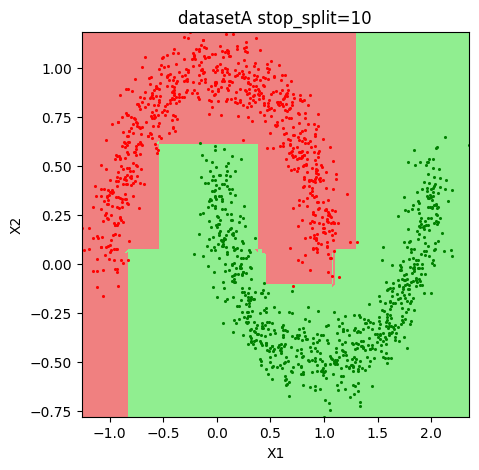

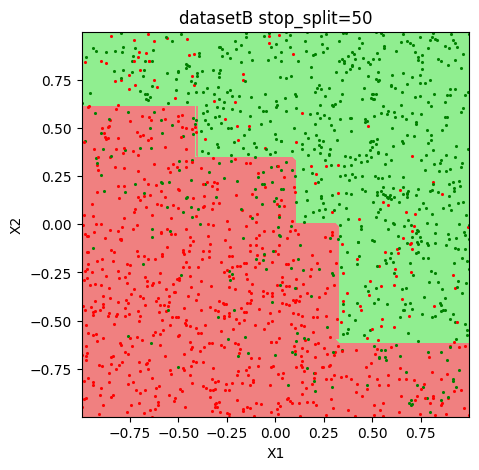

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2


minX1_1=X_traina[0][0]
minX2_1=X_traina[0][1]
maxX1_1=X_traina[0][0]
maxX2_1=X_traina[0][1]

minX1_2=X_trainb[0][0]
minX2_2=X_trainb[0][1]
maxX1_2=X_trainb[0][0]
maxX2_2=X_trainb[0][1]

fig, (ax1) =plt.subplots(1, 1)
fig.set_figwidth(5)
fig.set_figheight(5)
for m in range(len(X_traina)):
   minX1_1=min(minX1_1, X_traina[m][0])
   minX2_1=min(minX2_1, X_traina[m][1])

   maxX1_1=max(maxX1_1, X_traina[m][0])
   maxX2_1=max(maxX2_1, X_traina[m][1])


ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)


ftr_Z1=treeBA.eval_decision_tree(temp)

Z1=np.reshape(ftr_Z1,[100 ,100])


ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('datasetA stop_split=10')



for m in range(len(X_traina)):
   if Y_traina[m]==1:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)

   else:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)
plt.show()

fig, (ax1) =plt.subplots(1, 1)
fig.set_figwidth(5)
fig.set_figheight(5)
for m in range(len(X_trainb)):
   minX1_2=min(minX1_2, X_trainb[m][0])
   minX2_2=min(minX2_2, X_trainb[m][1])

   maxX1_2=max(maxX1_2, X_trainb[m][0])
   maxX2_2=max(maxX2_2, X_trainb[m][1])


ftr_X= np.linspace(minX1_2, maxX1_2, 100)
ftr_Y= np.linspace(minX2_2, maxX2_2, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)


ftr_Z1=treeBB.eval_decision_tree(temp)

Z1=np.reshape(ftr_Z1,[100 ,100])


ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('datasetB stop_split=50')



for m in range(len(X_trainb)):
   if Y_trainb[m]==1:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)

   else:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)
plt.show()

**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier.

class RandomForest:
 def __init__(self,num_trees =5,max_depth=10,num_nodes_stop=1):
    self.num_trees =num_trees
    self.max_depth=max_depth
    self.num_nodes_stop=num_nodes_stop

    self.trees=[]
    self.Tftrs=[]


 def train_random_forest(self,X, Y, num_trees=10, num_nodes_stop=1,
                        criterion='accuracy', a=0.5, b=0.5):

  """ Returns a random forest trained on X and Y.
  Trains num_trees.
  Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
  Split criterion can be either 'accuracy' or 'entropy'.
  Fraction of data used per tree = a
  Fraction of features used in each node = b
  Returns a random forest (In whatever format that you find appropriate)
  """
  self.trees=[]
  for i in range(0,num_trees):
    tree = DecisionTree(max_depth=10,stop_split=1)
    n = (X.shape)[0]
    ids=np.random.choice(n,int(n/2),replace=False)
    X_now =X[ids]
    Y_now =Y[ids]

    l=(X[0].shape)[0]
    ftrs=np.random.choice(l,int(l/2),replace=False)

    X_sample=[]
    Y_sample=Y_now

    for x in X_now:
      X_sample.append(x[ftrs])

    tree.train_decision_tree(np.array(X_sample),Y_sample)
    self.trees.append(tree)
    self.Tftrs.append(ftrs)

def eval_random_forest(random_forest, test_X):
  """ Takes in a  random forest object (hhowever you want to store it), and a bunch of instances X and
  returns the tree predicted values at those instances."""
  Y_pred=[]
  for x in test_X:
    pos=0
    neg=0
    f=0
    for tree in random_forest.trees:

      temp=[]

      temp.append(x[((random_forest.Tftrs)[f])])
      f =f +1

      if tree.eval_decision_tree(np.array(temp))==1:
        pos = pos +1
      else:
        neg = neg +1
    if pos > neg :
      Y_pred.append(1)
    else:
      Y_pred.append(-1)
  return Y_pred





In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

no_of_trees = [50,100,150,200,300]

errorA=2000
errorB=2000
errorC=2000
errorD=2000

treeBA = RandomForest()
treeBB= RandomForest()
treeBC = RandomForest()
treeBD= RandomForest()

bsplitA=1
bsplitB=1
bsplitC=1
bsplitD=1

for i in no_of_trees:
  treeA= RandomForest(num_trees=i)
  treeA.train_random_forest(X_trainA,Y_trainA)

  treeB= RandomForest(num_trees=i)
  treeB.train_random_forest(X_trainB,Y_trainB)

  treeC=RandomForest(num_trees=i)
  treeC.train_random_forest(X_trainC,Y_trainC)

  treeD=RandomForest(num_trees=i)
  treeD.train_random_forest(X_trainD,Y_trainD)

  Y_ansA= eval_random_forest(treeA,X_validA)
  Y_ansB= eval_random_forest(treeB,X_validB)
  Y_ansC= eval_random_forest(treeC,X_validC)
  Y_ansD=  eval_random_forest(treeD,X_validD)

  error_nowA=0
  error_nowB=0
  error_nowC=0
  error_nowD=0

  for j in range (0,len(Y_validA)):
    if Y_validA[j]!=Y_ansA[j] :
      error_nowA +=1
  if errorA > error_nowA :
    errorA=error_nowA
    treeBA=treeA
    bsplitA=i

  for j in range (0,len(Y_validB)):
    if Y_validB[j]!=Y_ansB[j] :
      error_nowB +=1
  if errorB > error_nowB :
    errorB=error_nowB
    treeBB=treeB
    bsplitB=i

  for j in range (0,len(Y_validC)):
    if Y_validC[j]!=Y_ansC[j] :
      error_nowC +=1
  if errorC > error_nowC :
    errorC=error_nowC
    treeBC=treeC
    bsplitC=i

  for j in range (0,len(Y_validD)):
    if Y_validD[j]!=Y_ansD[j] :
      error_nowD +=1
  if errorD > error_nowD :
    errorD=error_nowD
    treeBD=treeD
    bsplitD=i




print(bsplitA,bsplitB,bsplitC,bsplitD)

Y_ansA= eval_random_forest(treeBA,X_testa)
Y_ansB= eval_random_forest(treeBB,X_testb)
Y_ansC= eval_random_forest(treeBC,X_testc)
Y_ansD= eval_random_forest(treeBD,X_testd)

error_nowA=0
error_nowB=0
error_nowC=0
error_nowD=0

for j in range(0,len(X_testa)):
  if Y_testa[j]!=Y_ansA[j]:
    error_nowA +=1

for j in range(0,len(X_testb)):
  if Y_testb[j]!=Y_ansB[j]:
    error_nowB +=1

for j in range(0,len(X_testc)):
  if Y_testc[j]!=Y_ansC[j]:
    error_nowC +=1

for j in range(0,len(X_testd)):
  if Y_testd[j]!=Y_ansD[j]:
    error_nowD +=1



print(error_nowA,error_nowB,error_nowC,error_nowD)

Y_ansA= eval_random_forest(treeBA,X_traina)
Y_ansB= eval_random_forest(treeBB,X_trainb)
Y_ansC= eval_random_forest(treeBC,X_trainc)
Y_ansD= eval_random_forest(treeBD,X_traind)


error_nowA=0
error_nowB=0
error_nowC=0
error_nowD=0

for j in range(0,len(X_traina)):
  if Y_traina[j]!=Y_ansA[j]:
    error_nowA +=1

for j in range(0,len(X_trainb)):
  if Y_trainb[j]!=Y_ansB[j]:
    error_nowB +=1

for j in range(0,len(X_trainc)):
  if Y_trainc[j]!=Y_ansC[j]:
    error_nowC +=1

for j in range(0,len(X_traind)):
  if Y_traind[j]!=Y_ansD[j]:
    error_nowD +=1

print(error_nowA,error_nowB,error_nowC,error_nowD)







150 50 100 300
35 125 31 16
91 379 61 13


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).

list of hyperparameters =  [50,100,150,200,300]

criterion = accuracy \

\begin{array}{|c|c|} \hline
 Dataset & numTrees & trainError & testError \\ \hline
datasetA & 100 & 0.0866 & 0.11 \\ \hline
datasetB & 50 & 0.22866 & 0.264\\ \hline
datasetC & 150 & 0.0433 & 0.0909 \\ \hline
datasetD & 200 & 0.0275 & 0.0769 \\ \hline
\end{array}

   
criterion = entropy \

\begin{array}{|c|c|} \hline
 Dataset & numTrees & trainError & testError \\ \hline
datasetA & 200 & 0.04533 & 0.086 \\ \hline
datasetB & 200 & 0.148 & 0.304\\ \hline
datasetC & 50 & 0.0066 & 0.0538 \\ \hline
datasetD & 100 & 0.025 & 0.07100 \\ \hline
\end{array}

Observations:- \
By comparing error rates we can say that entropy is performing better than accuracy\
And best num_tree values are around 200. so in general we can say that accuracy increases \
as number of trees in forest increases\
random forests are performing better on real time data as compared to synthetic data



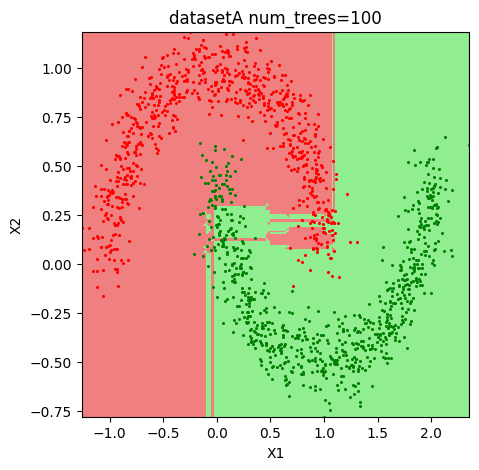

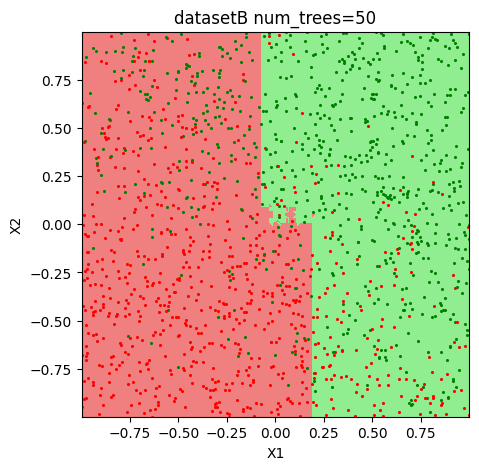

In [ ]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2


minX1_1=X_traina[0][0]
minX2_1=X_traina[0][1]
maxX1_1=X_traina[0][0]
maxX2_1=X_traina[0][1]

minX1_2=X_trainb[0][0]
minX2_2=X_trainb[0][1]
maxX1_2=X_trainb[0][0]
maxX2_2=X_trainb[0][1]

fig, (ax1) =plt.subplots(1, 1)
fig.set_figwidth(5)
fig.set_figheight(5)
for m in range(len(X_traina)):
   minX1_1=min(minX1_1, X_traina[m][0])
   minX2_1=min(minX2_1, X_traina[m][1])

   maxX1_1=max(maxX1_1, X_traina[m][0])
   maxX2_1=max(maxX2_1, X_traina[m][1])


ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)


ftr_Z1=eval_random_forest(treeBA,temp)

Z1=np.reshape(ftr_Z1,[100 ,100])


ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('datasetA num_trees=100')



for m in range(len(X_traina)):
   if Y_traina[m]==1:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)

   else:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)
plt.show()

fig, (ax1) =plt.subplots(1, 1)
fig.set_figwidth(5)
fig.set_figheight(5)
for m in range(len(X_trainb)):
   minX1_2=min(minX1_2, X_trainb[m][0])
   minX2_2=min(minX2_2, X_trainb[m][1])

   maxX1_2=max(maxX1_2, X_trainb[m][0])
   maxX2_2=max(maxX2_2, X_trainb[m][1])


ftr_X= np.linspace(minX1_2, maxX1_2, 100)
ftr_Y= np.linspace(minX2_2, maxX2_2, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)


ftr_Z1=eval_random_forest(treeBB,temp)

Z1=np.reshape(ftr_Z1,[100 ,100])


ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('datasetB num_trees=50')



for m in range(len(X_trainb)):
   if Y_trainb[m]==1:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)

   else:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)
plt.show()


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)


class Node:
   def __init__(self, feature=None , threshold=None, left=None,right=None, value=0):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


class DecisionTree:
   def __init__(self,stop_split=1,max_depth=2000,criterion='accuracy'):
     self.max_depth = max_depth
     self.stop_split=stop_split
     self.root=None
     self.criterion=criterion

   def b_split(self,X,Y,W):
     score=0
     b_ftr=0
     b_thr=0
     for i in range(0,len(X[0])):
       X_now=X[:,i]
       thresholds = np.unique(X_now)
       for j in thresholds:
         if self.criterion =='accuracy':

           vall= 0
           cntl=0
           cntr=0
           valr=0
           left_ids=np.argwhere(X_now<=j ).flatten()
           right_ids=np.argwhere(X_now>j ).flatten()
           if ((len(left_ids) == len(X)) or (len(right_ids) == len(X))):
             continue
           for k in range(0,len(X)):
             val=X[k]
             if val[i]>j:
               cntr+=W[k]
               if Y[k]==1:
                 valr+=W[k]
             if val[i]<=j:
               cntl+=W[k]
               if Y[k]==1:
                 vall+=W[k]
           sc_now = max(vall,cntl-vall) + max( valr,cntr-valr)

           if sc_now>score:
             score=sc_now
             b_ftr=i
             b_thr=j
     return b_ftr,b_thr



   def build(self,X,Y,W,depth):
     self.count = (X.shape )[0]
     self.no_features= (X.shape)[1]
     if ((depth>= self.max_depth) or (len(np.unique(Y))==1 )or (self.count<self.stop_split)):

         pos=0
         val=0
         neg=0

         for y in range(0,len(Y)):
           if Y[y]==1:
             pos= pos + W[y]
           else:
             neg= neg + W[y]
         if pos > neg :
           val=1
         else:
           val=-1
         return Node(value=val)

     b_ftr,b_thr= self.b_split(X,Y,W)

     X_bst=X[:,b_ftr]
     j=b_thr
     left_ids=np.argwhere(X_bst<=j ).flatten()
     right_ids=np.argwhere(X_bst>j ).flatten()


     left_child=self.build(X[left_ids, :], Y[left_ids],W[left_ids] ,depth + 1)
     right_child=self.build(X[right_ids, :], Y[right_ids],W[right_ids], depth + 1)
     return Node(b_ftr,b_thr,left_child,right_child)

   def traverse_tree(self,X,node):
     if node.value != 0:
       return node.value
     if X[node.feature] > node.threshold :
       return self.traverse_tree(X,node.right)
     else:
       return self.traverse_tree(X,node.left)

   def train_decision_tree(self,X, Y,W):
     """ Returns a decision tree trained on X and Y.
     Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
     Split criterion can be either 'accuracy' or 'entropy'.
     Returns a tree (In whatever format that you find appropriate)
     """
     self.root= self.build(X,Y,W,0)



   def eval_decision_tree(self, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""
    pred=[self.traverse_tree(x,self.root)for x in test_X]
    return np.array(pred)


'''

trees1 = []

X_trainA =np.array([[1,1],[2,1],[3,1],[4,1],[5,1]])
Y_trainA =np.array([-1,-1,1,1,1])


X_trainB =np.array([[1,1],[2,1],[3,1],[4,1],[5,1]])
Y_trainB =np.array([-1,-1,-1,-1,1])

tree1= DecisionTree(max_depth=0)
tree1.train_decision_tree(X_trainA,Y_trainA)
trees1.append(tree1)
tree1.train_decision_tree(X_trainB,Y_trainB)


trees1.append(tree1)

print(trees1[0].eval_decision_tree([[1,1]]))

print(trees1[1].eval_decision_tree([[1,1]]))


'''
def ada_boost(X_train,Y_train,X_test,Y_test,depth):

   X=X_train
   Y=Y_train
   g_x_train=[] #contains logarithimic vals
   g_x_test=[]
   W=[]

   for i in range(0,len(X_train)):
     W.append(1)
     g_x_train.append(0)
   for i in range(0,len(X_test)):
     g_x_test.append(0)



   train_acc=[]
   test_acc=[]
   for q in range(0,30):
     W=np.array(W)

     tree= DecisionTree(max_depth=depth)
     tree.train_decision_tree(X,Y,W)
     Y_pred=tree.eval_decision_tree(X)
     sc=0
     sum=0
     for y in range(0,len(Y_pred)):
       sum+=W[y]
       if Y[y]==Y_pred[y]:
         sc=sc+W[y]
     weight=(sc/(sum-sc))
     Y_trained=tree.eval_decision_tree(X_train)
     Y_tested=tree.eval_decision_tree(X_test)

     tr_acc=0
     te_acc=0
     for i in range(0,len(X_train)):
       g_x_train[i] = g_x_train[i] + (Y_trained[i])*(np.log(weight))
       if Y_train[i]== np.sign(g_x_train[i]):
         tr_acc = tr_acc +1

     for i in range(0,len(X_test)):
       g_x_test[i] = g_x_test[i] + (Y_tested[i])*(np.log(weight))
       if Y_test[i]== np.sign(g_x_test[i]):
         te_acc = te_acc +1

     train_acc.append(tr_acc/len(X_train))
     test_acc.append(te_acc/len(X_test))



     for i in range(0,len(X)):
       if Y_pred[i] != Y[i]:
         W[i]=(W[i]*int(weight))


   return tree,train_acc,test_acc


treeA1,train_accA1,test_accA1=ada_boost(X_traina,Y_traina,X_testa,Y_testa,0)
treeA2,train_accA2,test_accA2=ada_boost(X_traina,Y_traina,X_testa,Y_testa,2)
treeA3,train_accA3,test_accA3=ada_boost(X_traina,Y_traina,X_testa,Y_testa,6)


treeB1,train_accB1,test_accB1=ada_boost(X_trainb,Y_trainb,X_testb,Y_testb,0)
treeB2,train_accB2,test_accB2=ada_boost(X_trainb,Y_trainb,X_testb,Y_testb,2)
treeB3,train_accB3,test_accB3=ada_boost(X_trainb,Y_trainb,X_testb,Y_testb,6)


treeC1,train_accC1,test_accC1=ada_boost(X_trainc,Y_trainc,X_testc,Y_testc,0)
treeC2,train_accC2,test_accC2=ada_boost(X_trainc,Y_trainc,X_testc,Y_testc,2)
treeC3,train_accC3,test_accC3=ada_boost(X_trainc,Y_trainc,X_testc,Y_testc,6)

treeD1,train_accD1,test_accD1=ada_boost(X_traind,Y_traind,X_testd,Y_testd,0)
treeD2,train_accD2,test_accD2=ada_boost(X_traind,Y_traind,X_testd,Y_testd,2)
treeD3,train_accD3,test_accD3=ada_boost(X_traind,Y_traind,X_testd,Y_testd,6)


<ipython-input-32-7313891ef0ac>:171: RuntimeWarning: divide by zero encountered in scalar divide
  weight=(sc/(sum-sc))


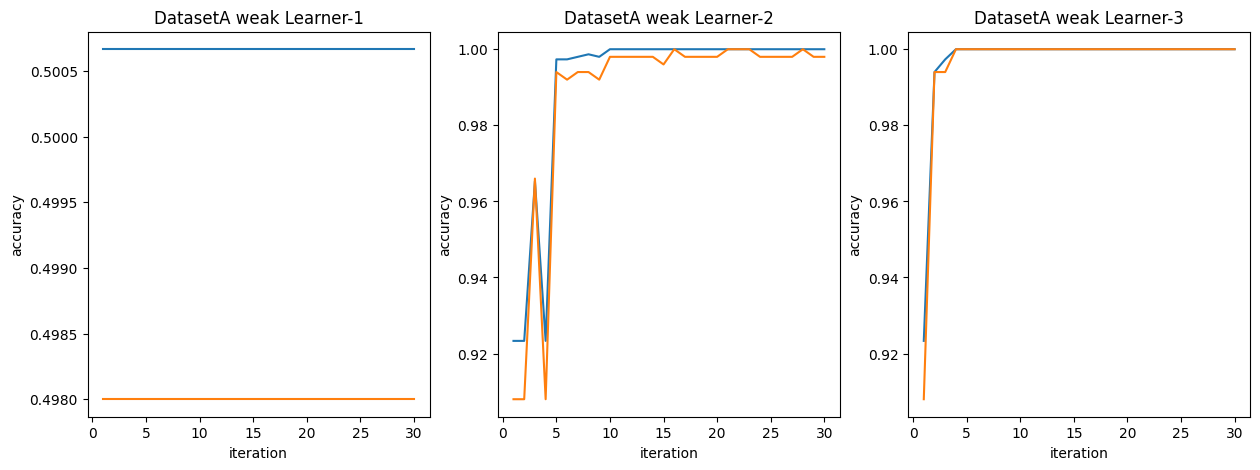

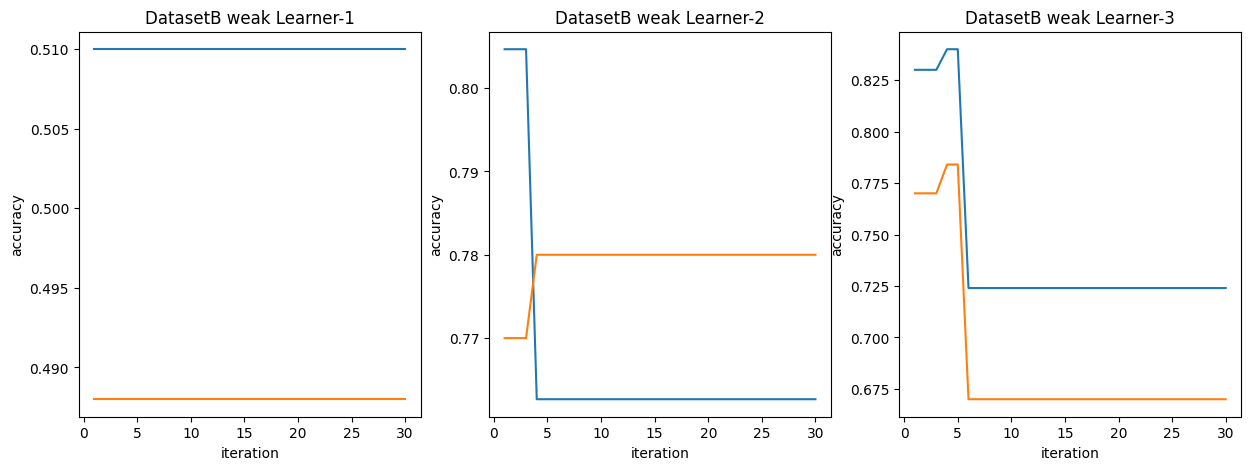

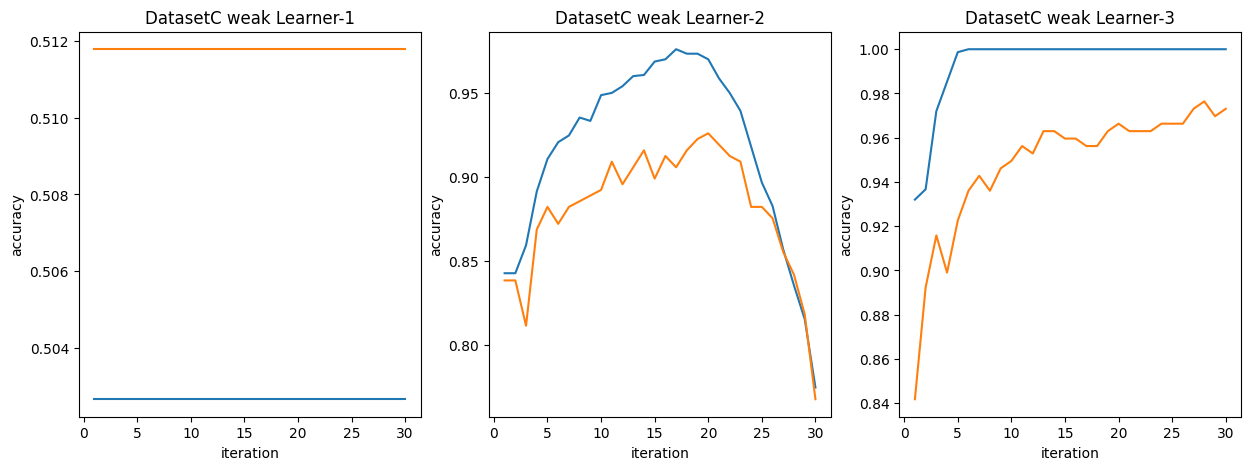

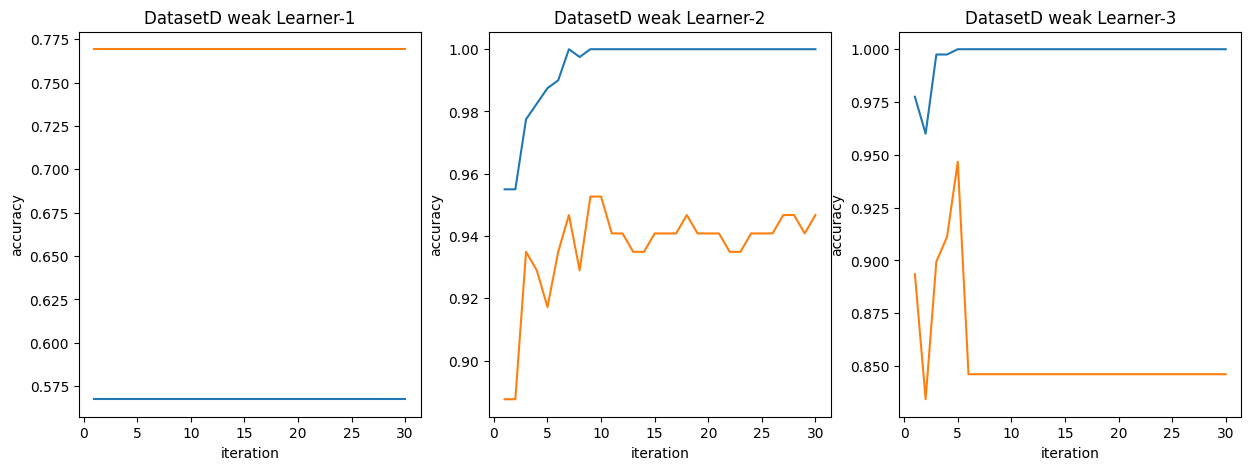

In [ ]:
# Codewrite cell
# Plots for iteration vs error here



X=[]
for i in range(1,31):
  X.append(i)
X=np.array(X)


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetA weak Learner-1')
ax1.plot(X,train_accA1)
ax1.plot(X,test_accA1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetA weak Learner-2')

ax2.plot(X,train_accA2)
ax2.plot(X,test_accA2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetA weak Learner-3')
ax3.plot(X,train_accA3)
ax3.plot(X,test_accA3)

plt.show()

#datasetB


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetB weak Learner-1')
ax1.plot(X,train_accB1)
ax1.plot(X,test_accB1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetB weak Learner-2')

ax2.plot(X,train_accB2)
ax2.plot(X,test_accB2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetB weak Learner-3')
ax3.plot(X,train_accB3)
ax3.plot(X,test_accB3)

plt.show()
#dataset-3
fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetC weak Learner-1')
ax1.plot(X,train_accC1)
ax1.plot(X,test_accC1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetC weak Learner-2')

ax2.plot(X,train_accC2)
ax2.plot(X,test_accC2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetC weak Learner-3')
ax3.plot(X,train_accC3)
ax3.plot(X,test_accC3)

plt.show()

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetD weak Learner-1')
ax1.plot(X,train_accD1)
ax1.plot(X,test_accD1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetD weak Learner-2')

ax2.plot(X,train_accD2)
ax2.plot(X,test_accD2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetD weak Learner-3')
ax3.plot(X,train_accD3)
ax3.plot(X,test_accD3)

plt.show()




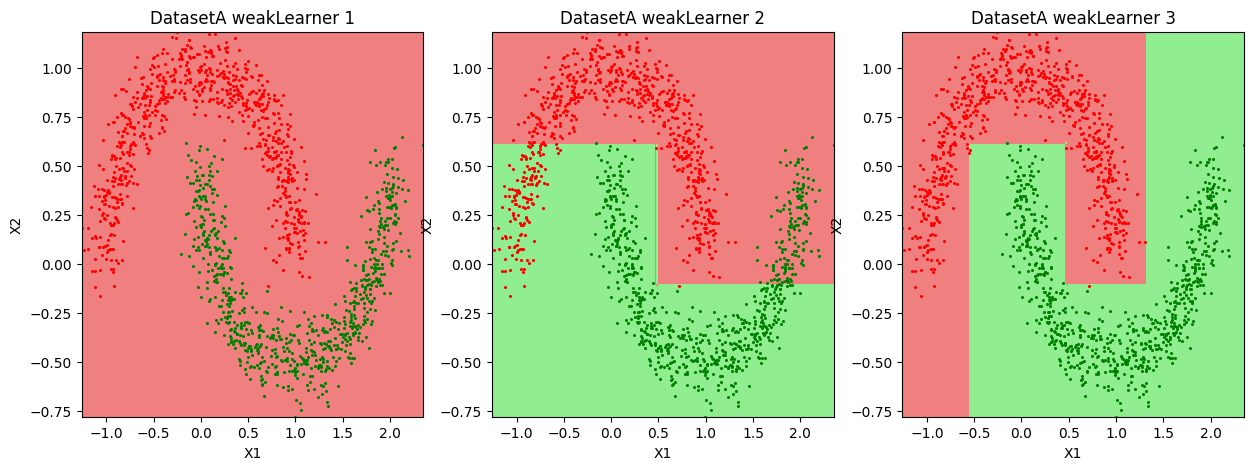

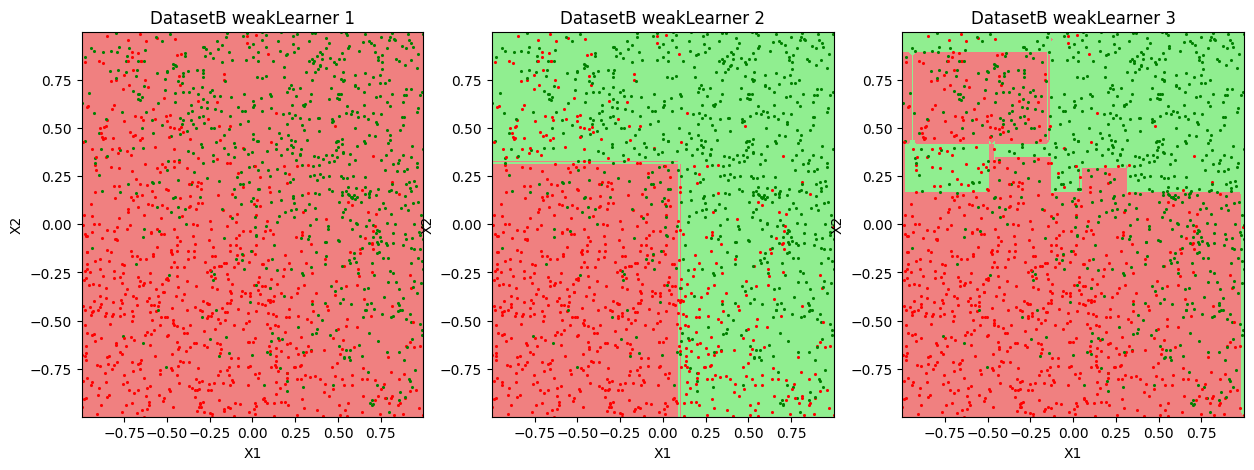

In [ ]:
# Codewrite cell
# Plots for illustrating the classifier here
# Codewrite cell
# Plots for illustrating the classifier here

minX1_1=X_traina[0][0]
minX2_1=X_traina[0][1]
maxX1_1=X_traina[0][0]
maxX2_1=X_traina[0][1]


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_traina)):
   minX1_1=min(minX1_1, X_traina[m][0])
   minX2_1=min(minX2_1, X_traina[m][1])

   maxX1_1=max(maxX1_1, X_traina[m][0])
   maxX2_1=max(maxX2_1, X_traina[m][1])




ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = treeA1.eval_decision_tree(temp)
ftr_Z2 = treeA2.eval_decision_tree(temp)
ftr_Z3 = treeA3.eval_decision_tree(temp)


Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, Z2,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, Z3,colors=['lightcoral', 'lightgreen'])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('DatasetA weakLearner 1')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('DatasetA weakLearner 2')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('DatasetA weakLearner 3')

for m in range(len(X_traina)):
   if Y_traina[m]==1:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_traina[m][0],X_traina[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_traina[m][0],X_traina[m][1],c='red',s=5,linewidth=0)

plt.show()


#for datasetB

minX1_1=X_trainb[0][0]
minX2_1=X_trainb[0][1]
maxX1_1=X_trainb[0][0]
maxX2_1=X_trainb[0][1]


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_trainb)):
   minX1_1=min(minX1_1, X_trainb[m][0])
   minX2_1=min(minX2_1, X_trainb[m][1])

   maxX1_1=max(maxX1_1, X_trainb[m][0])
   maxX2_1=max(maxX2_1, X_trainb[m][1])




ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = treeB1.eval_decision_tree(temp)
ftr_Z2 = treeB2.eval_decision_tree(temp)
ftr_Z3 = treeB3.eval_decision_tree(temp)


Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, Z2,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, Z3,colors=['lightcoral', 'lightgreen'])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('DatasetB weakLearner 1')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('DatasetB weakLearner 2')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('DatasetB weakLearner 3')

for m in range(len(X_trainb)):
   if Y_trainb[m]==1:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_trainb[m][0],X_trainb[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_trainb[m][0],X_trainb[m][1],c='red',s=5,linewidth=0)

plt.show()

Textwrite cell:

Observations:- \
accuracy of weak learner one remained constant as it is just one node decision tree all of the datasets must be classified as one class. so ada_boost couldnt help much

After some iterations the accuracy remained constant in most of the graphs






**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [1]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
w = np.array([1., 2, 3, 4])
l1_norm = 2
print("Projected vector:", projection_oracle_l1(w, l1_norm))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

def lasso_regression_loss(X, y, w, lmbda):
    """Compute Lasso Regression loss"""
    num_instances = X.shape[0]
    residuals = y - X.dot(w)
    loss = 0.5 * np.mean(residuals**2) + lmbda * np.linalg.norm(w, ord=1)
    return loss

def lasso_regression_gradient(X, y, w, lmbda):
    """Compute gradient of Lasso Regression loss"""
    num_instances = X.shape[0]
    residuals = y - X.dot(w)
    gradient = -X.T.dot(residuals) / num_instances + lmbda * np.sign(w)
    return gradient

def projected_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, lmbda, max_iterations=1000, tolerance=1e-5):
    """Projected Gradient Descent for Lasso Regression"""
    num_features = X_train.shape[1]
    w = np.zeros(num_features)
    losses_train = []
    losses_val = []

    for iteration in range(max_iterations):
        # Compute gradient
        gradient = lasso_regression_gradient(X_train, y_train, w, lmbda)

        # Update weights
        w -= learning_rate * gradient

        # Project onto L1 norm ball
        w = projection_oracle_l1(w, lmbda) #projection_onto_L1_ball(w, lmbda)

        # Compute training and validation loss
        loss_train = lasso_regression_loss(X_train, y_train, w, lmbda)
        loss_val = lasso_regression_loss(X_val, y_val, w, lmbda)

        losses_train.append(loss_train)
        losses_val.append(loss_val)

        # Check for convergence
        if iteration > 0 and np.abs(losses_train[-1] - losses_train[-2]) < tolerance:
            break

    return w, losses_train, losses_val

NameError: name 'np' is not defined

In [4]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w

# Load the dataset
data = np.load('/content/LassoReg_data.npz')
X, y = data['X'], data['y']

# Split the data into train-validation-test sets (50-25-25 ratio)
num_instances = X.shape[0]
num_train = num_instances // 2
num_val = (num_instances - num_train) // 2
num_test = num_instances - num_train - num_val

X_train, y_train = X[:num_train], y[:num_train]
X_val, y_val = X[num_train:num_train + num_val], y[num_train:num_train + num_val]
X_test, y_test = X[num_train + num_val:], y[num_train + num_val:]

# Define learning rates and L1 norm radii to try
learning_rates = [0.001, 0.01, 0.1]
lmbda_values = [0.1, 0.5, 1.0]

best_model = None
best_loss_val = float('inf')
best_learning_rate = None
best_lmbda = None

# Train models for different combinations of learning rates and L1 norm radii
for learning_rate in learning_rates:
    for lmbda in lmbda_values:
        # Train the model
        w, losses_train, losses_val = projected_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, lmbda)
        loss_val = losses_val[-1]

        # Check if this model is the best so far
        if loss_val < best_loss_val:
            best_model = w
            best_loss_val = loss_val
            best_learning_rate = learning_rate
            best_lmbda = lmbda

# Report the best model and conclusions
print("Best Model:")
print("Learning Rate:", best_learning_rate)
print("L1 Norm Radius:", best_lmbda)
print("Validation Loss:", best_loss_val)

# Evaluate the best model on the test set
loss_test = lasso_regression_loss(X_test, y_test, best_model, best_lmbda)
print("Test Loss:", loss_test)


NameError: name 'np' is not defined

In [ ]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set

def validate_model(X_val, y_val, w):
    """Validate the learned model on the validation set"""
    loss_val = lasso_regression_loss(X_val, y_val, w)
    return loss_val

loss_val = validate_model(X_val, y_val, w)
print("Validation Loss:", loss_val)

# Evaluate the model on the test set
loss_test = validate_model(X_test, y_test, w)
print("Test Loss:", loss_test)

# Train the model
w, losses_train, losses_val = projected_gradient_descent(X_train, y_train, X_val, y_val, best_learning_rate, best_lmbda)

# Plot loss curves
plt.plot(losses_train, label='Training Loss')
plt.plot(losses_val, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

#Textwrite cell:
